# Исследование объявлений о продаже квартир

Данные: архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически 
на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

Цель: проанализировать параметры и выявить те, которые влияют на рыночную стоимость объектов недвижимости.

## Оглавление <a id="contents"></a>

1. [Обзор и первичное исследование данных](#description)

    1.1 [Описание данных](#description)

    1.2 [Открытие данных](#start)

    1.3 [Изучение общей информации](#main_info)
    
    1.4 [Проверка корректность наименований столбцов](#columns_info)
    
    1.5 [Анализ статистических данных и оценка достоверности](#stat_info)
    
    1.6 [Анализ пропусков](#nulls)
     
    1.7 [Вывод по результатам первичного исследования](#main_conclusion)
    
    
2. [Предобработка данных](#preprocessing)

    2.1 [Обработка пропущенных значений](#null)
    
    2.2 [Замена типа данных](#type)
    
    2.3 [Обработка дубликатов](#duplicates)
    
    
3. [Расчет дополнительных значений для анализа](#add_values)

    3.1 [Цена квадратного метра](#add_values)

    3.2 [День недели, месяц и год публикации объявления](#first_day_exposition)

    3.3 [Категоризация этажей](#floor_category)
    
    3.4 [Словари](#dictionary)
   
   
    
4. [Исследовательский анализ данных и выполнение инструкций](#4)

    4.1 [Изучение параметров: площадь, цена, число комнат, высота потолков. Построение гисторгамм](#4_1)
    
      4.1.1 [Площадь квартир](#4_1_1)
        
      4.1.2 [Цена за метр](#4_1_2)
        
      4.1.3 [Количество комнат](#4_1_3)
        
      4.1.4 [Высота потолков](#4_1_4)
        
      4.1.5 [Время продажи квартиры](#4_1_5)
    
    4.2 [Удаление редких и выбивающихся значений. Особенности.](#4_2)
    
    4.3 [Влияние различных факторов на стоимость квартиры](#4_3)
    
      4.3.1 [Зависимость цены от площади, числа комнат, удалённости от центра](#4_3_1)
        
      4.3.2 [Зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом](#4_3_2)
        
      4.3.3 [Зависимость цены от даты размещения: дня недели, месяца и года](#4_3_3)
   
    4.4 [10 населённых пунктов с наибольшим числом объявлений](#4_4)
    
    4.5 [Изучение данных по центру Санкт-Петербург](#4_5)
    
      4.5.1 [Изучение параметров: площадь, цена, число комнат, высота потолков по центру Санкт-Петербурга](#4_5_1)
        
      4.5.2 [Зависимость цены от различных параметров по центру Санкт-Петербурга](#4_5_2)
        
      -[площадь, число комнат, удалённость от центра](#4_5_2_1)
      
      -[зависимость цены от того, на каком этаже расположена квартира](#4_5_2_2)
      
      -[зависимость цены от даты размещения: дня недели, месяца и года](#4_5_2_3)
    
    4.6 [Сравнение параметров и зависимостей по Санкт-Петербургу в целом и центру](#4_6)
    
      4.6.1 [Сравнение параметров: площадь, цена, число комнат, высота потолков](#4_6_1)
        
      4.6.2 [Сравнение зависимости цены от различных параметров](#4_6_2)
        
      -[площадь, число комнат, удалённость от центра](#4_6_2_1)
      
      -[зависимость цены от того, на каком этаже расположена квартира](#4_6_2_2)
      
      -[зависимость цены от даты размещения: дня недели, месяца и года](#4_6_2_3)
   
5.[Общий вывод](#conclusion)

##  1. Обзор и первичное исследование данных

**1.1 Описание данных** <a id="description"></a>

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

balcony — число балконов 

ceiling_height — высота потолков (м)

city_centers_nearest — расстояние до центра города (м)

days_exposition — сколько дней было размещено объявление (от публикации до снятия) 

first_day_exposition — дата публикации 

floor — этаж 

floors_total — всего этажей в доме

is_apartment — апартаменты (булев тип) 

kitchen_area — площадь кухни в квадратных метрах (м²) 

last_price — цена на момент снятия с публикации 

living_area — жилая площадь в квадратных метрах(м²) 

locality_name — название населённого пункта 

open_plan — свободная планировка (булев тип) 

parks_around3000 — число парков в радиусе 3 км 

parks_nearest — расстояние до ближайшего парка (м)

ponds_around3000 — число водоёмов в радиусе 3 км 

ponds_nearest — расстояние до ближайшего водоёма (м)

rooms — число комнат 

studio — квартира-студия (булев тип) 

total_area — площадь квартиры в квадратных метрах (м²) 

total_images — число фотографий квартиры в объявлении 

Пояснение: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.

[В начало](#contents)

**1.2 Открытие данных** <a id="start"></a>

In [1]:
import pandas as pd
from IPython.display import display
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import datetime as dt

In [2]:
local_file = 'C:\\Users\\...\\real_estate_data.csv'
praktikum_file = '.../real_estate_data.csv'

try:
    df = pd.read_csv(local_file, sep='\t')
    print('Файл с данными из локального хранилища успешно открыт и сохранен в переменной df.')
except:
    df = pd.read_csv(praktikum_file, sep='\t')
    print('Файл с данными успешно открыт и сохранен в переменной df.')    
else:
    print('Ошибки при открытии файла. Проверьте переменные.')

Файл с данными успешно открыт и сохранен в переменной df.


[В начало](#contents)

**1.3 Изучение общей информации** <a id="main_info"></a>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В большей части столбцов имеются пропуски, без пропуском только 8 столбов из 22. Далее детальнее изучим данные с пропусками: можно ли и нужно ли их заполнять, и, конечно же, какими значениями. 

[В начало](#contents)

**1.4 Проверка корректность наименований столбцов** <a id="columns_info"></a>

In [4]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

В названии столбца 'cityCenters_nearest' есть заглавная буква в середине, которая означает начало следующего слова, что не соответствует общей концепции, по которой называем столбцы, лучше добавить нижнее подчеркивание между разными словами. 

In [5]:
df.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}, inplace=True)

In [6]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Столбцы названы корректно : пробелы в начале и конце отсутствуют, названия из 2х и более слов записаны через нижнее подчеркивание, набраны в одном регистре, использован один язык (латиница), во всех столбцах в названиях в краткой форме отражена суть содержащейся в столбцах информации.

[В начало](#contents)

**1.5 Анализ статистических данных и оценка достоверности** <a id="stat_info"></a>

In [7]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Изучим внешний вид таблицы. Кроме большого количества пропусков так же видим, что для части данных неплохо бы изменить тип данных: 
- `is_apartment` сейчас тип - `object`, больше подходит булев тип,
- `balcony`, `days_exposition`, `floors_total` - тип `float`, хотя количество балконов, дней размещения объявления и этажность дома явно целое число, т.е. тип `int`,
- `first_day_exposition` - тип `object` лучше преобразовать в тип `datetime`.

Изменение типа данных нам нужно не только для большей логичности представления данных в таблице, но и для сокращения объема используемой памяти.

Оценим статистические данные:

In [8]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Есть явные выбросы по максимумам: по площади квартиры (900 кв. метров при среднем 52 и 3ей квартиле 69,9), кол-ву комнат - 19 шт. Вполне возможно, что такие квартиры тоже были в продаже. При этом средние значения вполне реалистичны, размеры квартир колеблются от 40 до 70 кв.метров для однокомнатных - трехкомнатных квартир. Данные по жилой площади, площади кухонь и количеству балконов в принципе соотносится с данными по количеству комнат и общей площади.  

Странное максимальное значение по высоте потолка - 100 метров. Ни каждое высотное здание имеет такую высоту... Это явно опечатка.  

Данные по этажам выглядят достоверно, бОльшая часть домов построена в 20 веке, тогда редко строили дома выше 10 этажей, чем объясняются средние значения. При этом в последние десятилетия технологии позволяют стоить и очень высокие дома, чем объясняются максимум в 60 этажей.

[В начало](#contents)

**1.6 Анализ пропусков** <a id="nulls"></a>

Посмотрим на количество пропусков в абсолютном выражении и доле от общего числа строк:

In [9]:
(df.isna().sum()).sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
city_centers_nearest     5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

In [10]:
(df.isna().sum()/len(df)).sort_values(ascending=False)

is_apartment            0.882906
parks_nearest           0.659100
ponds_nearest           0.615596
balcony                 0.486054
ceiling_height          0.387991
airports_nearest        0.233850
city_centers_nearest    0.232879
ponds_around3000        0.232837
parks_around3000        0.232837
days_exposition         0.134225
kitchen_area            0.096122
living_area             0.080299
floors_total            0.003629
locality_name           0.002068
total_images            0.000000
last_price              0.000000
studio                  0.000000
floor                   0.000000
rooms                   0.000000
first_day_exposition    0.000000
total_area              0.000000
open_plan               0.000000
dtype: float64

- **апартаменты** - с учетом того, что дома "живут" не год и не два, а "апартаменты" в привычном для нас понимании стали появляться не слишком давно, можно предположить, что и поле для заполнения появилось не сразу. Исходя из этих рассуждений делаем вывод, что все незаполненные значения - не апартаменты. Будем заполнять их на следующем этапе значениям False.

- **число балконов** - правдоподобным выглядит предположение, что данные по количеству балконов могут быть не заполнены, если в продаваемой недвижимости балконов нет. Заполним пропуски нулями. 

- данные о **высоте потолков** отсутсвуют почти в 40 %. При этом нам нужно будет изучить влияние данного параметра. С учетом того, что высота потолка обычно колеблется от 2,5 до 3-3,5 метров, будем заполнять пропуски по медиане имеющихся значений.

- **удаленность от центра** не указана в 23 % случаев. Посмотрим сколько из них относится к городу, а сколько к области.

In [11]:
no_info_city_centers_date = df[df['city_centers_nearest'].isna()]

count_stp = (no_info_city_centers_date
             [no_info_city_centers_date['locality_name'] == 'Санкт-Петербург']['locality_name'].count())

print('Количество пропусков по столбцу "city_centers_nearest":', (df['city_centers_nearest'].isna().sum()))  
print('Количество пропусков по столбцу "city_centers_nearest" в Санкт-Петербурге: ', count_stp)
print('Количество населенных пунктов:', len(df['locality_name'].unique()))

Количество пропусков по столбцу "city_centers_nearest": 5519
Количество пропусков по столбцу "city_centers_nearest" в Санкт-Петербурге:  61
Количество населенных пунктов: 365


In [12]:
no_info_city_centers_date_2 = df.loc[df.loc[:, 'city_centers_nearest'].isna()]

count_stp = (no_info_city_centers_date.loc
              [no_info_city_centers_date.loc[:, 'locality_name'] == 'Санкт-Петербург']['locality_name'].count())

print('Количество пропусков по столбцу "city_centers_nearest":', (df.loc[:, 'city_centers_nearest'].isna().sum()))  
print('Количество пропусков по столбцу "city_centers_nearest" в Санкт-Петербурге: ', count_stp)
print('Количество населенных пунктов:', len(df['locality_name'].unique()))

Количество пропусков по столбцу "city_centers_nearest": 5519
Количество пропусков по столбцу "city_centers_nearest" в Санкт-Петербурге:  61
Количество населенных пунктов: 365


   Большая часть значений относится к недвижимости в небольших городах и поселках в области. Удаленность от центра представляется имеющим значение показателем  для города, а не для области. К тому же мы не располагаем дополнительными данными, чтобы достоверно определить удаленность от центра. Заполнение по среднему значению или медиане выглядит необоснованным. Если заполнять медианой с группировкой по населенным пунктам, то групп будет много и медианное значение может быть не достоверным, если оно вообще будет, т.к. уникальных значений в списке, как дней в году, 365 шт.

- пропуски в **количестве дней размещения объявлений** - 13 % или 3 181 шт. Вполне возможно, что поле не заполнено, т.к. объявление еще не было снято с публикации на момент выгрузки данных. Проверим:

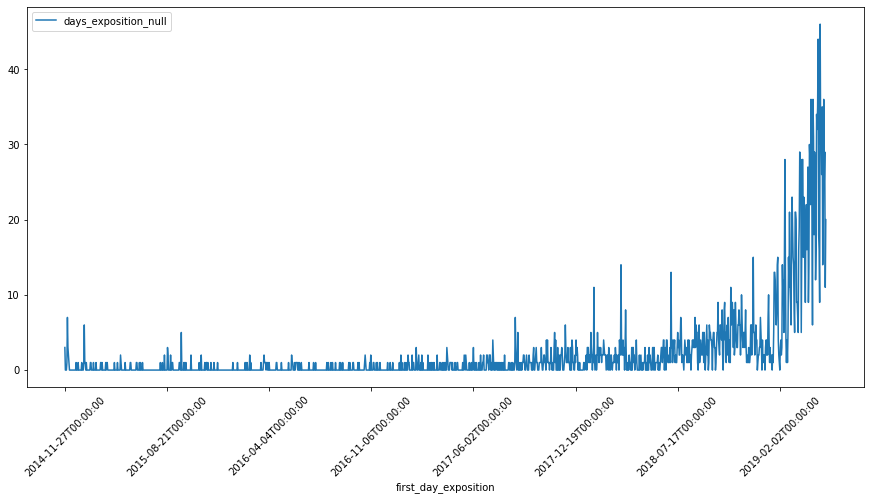

In [13]:
df['days_exposition_null'] = df['days_exposition'].isna().astype(int)
df.groupby('first_day_exposition')['days_exposition_null'].sum().plot(figsize=(15, 7), legend=True, rot=45)
plt.show()

Количество пропусков растет к концу периода. Скорее всего наше предположение о незакрытых объявлениях верно. В таком случае заполнять пропуски не стоит, т.к. средними значениями мы исказим данные. Заполнение датой выгрузки тоже не совсем правильное, т.к. объявления на самом деле не закрыты. 

- пропуски в **living_area** и  **kitchen_area**

Посмотрим есть ли зависимость между данными этих столбцов и общей площадью.

In [14]:
print('Коэффициент корреляции жилой и общей площади:', (df['living_area'].corr(df['total_area'])).round(2))
print('Коэффициент корреляции общей площади и площади кухни:', (df['kitchen_area'].corr(df['total_area'])).round(2))

Коэффициент корреляции жилой и общей площади: 0.94
Коэффициент корреляции общей площади и площади кухни: 0.61


Проверим корреляцию с количеством комнат:

In [15]:
print('Коэффициент корреляции жилой площади и количеством комнат:', (df['living_area'].corr(df['rooms'])).round(2))
print('Коэффициент корреляции общей площади и количеством комнат:', (df['kitchen_area'].corr(df['rooms'])).round(2))

Коэффициент корреляции жилой площади и количеством комнат: 0.85
Коэффициент корреляции общей площади и количеством комнат: 0.27


Между жилой и общей площадью прослеживается линейная зависимость (коэффициент близок к единице). На этапе заполнения пропусков используем соотношение этих площадей для заполнения пропусков по медиане (т.к. она более устойчива к выбросам, чем среднее значение). 

Коэффициент корреляции между общей площадью и площадью кухни 0,61, что говорит о некоторой зависимости, но не такой явной, как с жилой площадью. И действительно, иногда встречаются 3х-комнатные квартиры с очень маленькой кухней! Поэтому заполнять пропуски в размерах кухни на основании данных об общей площади не будем. 

- в пропусках **kitchen_area** проверим есть ли квартиру-студии. Для студий как правило не указывается размер кухни, т.к. кухня является частью жилой зоны. Заполним строки нулевыми значениями, оставшиеся пропуски в **kitchen_area** не будем заполнять. 

- общее **количество этажей** можно более-менее достоверно определить исходя из среднего/медианного значения этажей по населенному пункту и максимального значения, если медиана окажется меньше указанного этажа.

In [16]:
df1 = df.sort_values(by='locality_name')

In [17]:
df1['locality_name'].unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

- есть 49 строк без указания **населенного пункта**. Удалим эти строки, т.к. данные по местонахождению нам нужны будут только по 10 населенных пунктам с наибольшим числом объявлений и 49 строк не исказит результат. И у нас всё равно нет достоверных данных для заполнения. Так же удалим наименование типов населенных пунктов, оставим только сами названия, чтобы исключить дубликаты из-за различного написания типов, например, "посёлок" и "поселок".

**1.7 Вывод по результатам первичного исследования** <a id="main_conclusion"></a>

Данные содержат большое количество пропусков по различным показателям. Не все из них можно заполнить достоверной информацией на основании имеющейся. Заполним то, что сможем исходя из анализа в п. 1.6.

Также нужно будет внести изменения в типы данных: 
- замена на логический тип переменной в `is_apartment`, 
- преобразуем текущий тип `first_day_exposition` в тип `datetime`,
- в количественных переменных (`balcony`, `floors_total`) меняем тип с `float` на `int`,
- в количественных переменных с типом `float` поработаем с количеством знаков после запятой.  

[В начало](#contents)

## 2. Предобработка данных <a id="preprocessing"></a>

**2.1 Обработка пропущенных значений** <a id="null"></a>

[В начало](#contents)

**2.1.1 'is_apartment'** <a id="is_apartment"></a>

In [18]:
print('Количество пропусков в столбце "is_apartment" до обработки:', df['is_apartment'].isna().sum())
df.loc[(df['is_apartment'].isna()), 'is_apartment'] = False
print('Количество пропусков в столбце "is_apartment" после обработки:', df['is_apartment'].isna().sum())

Количество пропусков в столбце "is_apartment" до обработки: 20924
Количество пропусков в столбце "is_apartment" после обработки: 0


[В начало](#contents)

**2.1.2 'balcony'** <a id="balcony"></a>

In [19]:
print('Количество пропусков в столбце "balcony" до обработки:', df['balcony'].isna().sum())
df['balcony'] = df['balcony'].fillna(0)
print('Количество пропусков в столбце "balcony" после обработки:', df['balcony'].isna().sum())

Количество пропусков в столбце "balcony" до обработки: 11519
Количество пропусков в столбце "balcony" после обработки: 0


[В начало](#contents)

**2.1.3 'ceiling_height'** <a id="ceiling_height"></a>

In [20]:
print('Количество пропусков в столбце "ceiling_height" до обработки:', df['ceiling_height'].isna().sum())
df.loc[df['ceiling_height'].isna(), 'ceiling_height'] = df['ceiling_height'].median()
print('Количество пропусков в столбце "ceiling_height" после обработки:', df['ceiling_height'].isna().sum())

Количество пропусков в столбце "ceiling_height" до обработки: 9195
Количество пропусков в столбце "ceiling_height" после обработки: 0


**2.1.4 Соотношение жилой и общей площади, площади кухни к общей** <a id="corr_total_area"></a>

In [21]:
#округлим показатели общей площади, чтобы уменьшить количество групп
df['total_area'] = df['total_area'].astype('int')

df['ratio_living_and_total_area'] = (df['living_area'] / df['total_area']).round(2)
df['ratio_kitchen_and_total_area'] = (df['kitchen_area'] / df['total_area']).round(2)

In [22]:
df[['total_area', 'living_area', 'ratio_living_and_total_area', 'kitchen_area', 'ratio_kitchen_and_total_area']].head()

,total_area,living_area,ratio_living_and_total_area,kitchen_area,ratio_kitchen_and_total_area
0,108,51.0,0.47,25.0,0.23
1,40,18.6,0.46,11.0,0.28
2,56,34.3,0.61,8.3,0.15
3,159,NaN,NaN,NaN,NaN
4,100,32.0,0.32,41.0,0.41


Как решили ранее, заполним пропуски в данных о жилой площади медианой с группировкой по соотношению жилой и общей площади. 

In [23]:
print('Количество пропусков в столбце "living_area" до обработки:', df['living_area'].isna().sum())

for total_area in df['total_area'].unique():
    median = df.loc[df['total_area'] == total_area, 'ratio_living_and_total_area'].median()
    df.loc[(df['living_area'].isna()) & (df['total_area'] == total_area), 'living_area'] = df['total_area']*median

print('Количество пропусков в столбце "living_area" после обработки:', df['living_area'].isna().sum())

Количество пропусков в столбце "living_area" до обработки: 1903
Количество пропусков в столбце "living_area" после обработки: 15


Осталось 15 пропущенных значений. По сравнению с тем, что было, довольно мало, оставим в таком виде.  

[В начало](#contents)

**2.1.5 'kitchen_area'** <a id="kitchen_area"></a>

Проверим, входит ли в число квартир с пропущенными значениями квартиры-студии. 

In [24]:
df.groupby('studio')['studio'].count()

studio
False    23550
True       149
Name: studio, dtype: int64

In [25]:
df.query('kitchen_area.isna()').groupby('studio')['studio'].count()

studio
False    2129
True      149
Name: studio, dtype: int64

Для всех студий из таблицы не заполнены данные о размере кухни. Заполним их нулями, т.к. как отмечали выше, для студий не выделяется зона кухни. 

In [26]:
df.loc[df['studio'] == True, 'kitchen_area'] = 0
    
print('Пропуски после:', df['kitchen_area'].isna().sum())

Пропуски после: 2129


[В начало](#contents)

**2.1.6 'floors_total'** <a id="floors_total"></a>

Заполним пропуски по общему количеству этажей в доме исходя из медианы по населенному пункту или максимальным значением, если этаж (столбец 'floor') оказался выше медианного значения. 

In [27]:
print('Количество пропусков в столбце "floors_total" до обработки:', df['floors_total'].isna().sum())

group_median = df.groupby(['locality_name']).agg({'floors_total':'median'}).reset_index()
group_max = df.groupby(['locality_name']).agg({'floors_total':'max'}).reset_index()

general_median = df['floors_total'].median()
general_max = df['floors_total'].max()

def floors_total_fill(row):
    if np.isnan(row['floors_total']):
        try:
            current_median = group_median[group_median['locality_name'] == row['locality_name']]['floors_total'].values[0]
            current_max = group_max[group_max['locality_name'] == row['locality_name']]['floors_total'].values[0]
        except:
            current_median = general_median
            current_max = general_max
      
        if row['floor'] <= current_median: 
            return current_median
        else:
            return current_max
    return row['floors_total']
df['floors_total'] = df.apply(floors_total_fill, axis=1)

print('Количество пропусков в столбце "floors_total" после обработки:', df['floors_total'].isna().sum())

Количество пропусков в столбце "floors_total" до обработки: 86
Количество пропусков в столбце "floors_total" после обработки: 0


[В начало](#contents)

**2.1.7 'locality_name'** <a id="locality_name"></a> 

Удалим строки с отсутствующими значениями и уберем виды населенных пунктов, чтобы избежать дубликатов.

In [28]:
print('Количество уникальных значений в названиях населенных пунктов до обработки:', len(df['locality_name'].unique()))

df.dropna(subset=['locality_name'], inplace=True)
df['locality_name'] = df['locality_name'].str.lower()
df['locality_name'] = df['locality_name'].str.replace('городской |коттеджный |поселок |посёлок |деревня \
|городского |типа |станции |при |железнодорожной |садоводческое |некоммерческое |товарищество |село |форт ', '')

print('Количество уникальных значений в названиях населенных пунктов после обработки:', len(df['locality_name'].unique()))

Количество уникальных значений в названиях населенных пунктов до обработки: 365
Количество уникальных значений в названиях населенных пунктов после обработки: 307


In [29]:
df['locality_name'].unique()

array(['санкт-петербург', 'шушары', 'янино-1', 'парголово', 'мурино',
       'ломоносов', 'сертолово', 'петергоф', 'пушкин', 'кудрово',
       'коммунар', 'колпино', 'красный бор', 'гатчина', 'фёдоровское',
       'выборг', 'кронштадт', 'кировск', 'новое девяткино',
       'металлострой', 'лебяжье', 'сиверский', 'молодцово',
       'кузьмоловский', 'садовое новая ропша', 'павловск', 'пикколово',
       'всеволожск', 'волхов', 'кингисепп', 'приозерск', 'сестрорецк',
       'куттузи', 'аннино', 'ефимовский', 'плодовое', 'заклинье',
       'торковичи', 'первомайское', 'красное село', 'понтонный',
       'сясьстрой', 'старая', 'лесколово', 'новый свет', 'сланцы',
       'путилово', 'ивангород', 'шлиссельбург', 'никольское',
       'зеленогорск', 'сосновый бор', 'оржицы', 'кальтино', 'романовка',
       'бугры', 'рощино', 'кириши', 'луга', 'волосово', 'отрадное',
       'павлово', 'оредеж', 'копорье', 'молодёжное', 'тихвин', 'победа',
       'нурма', 'синявино', 'тосно', 'стрельна', 'боксит

**2.1.7.1 Пруды и парки** <a id="pounds"></a>

Попробуем заполнить пропуски о прудах и парках медианой с группировкой по населенным пунктам, но сделаем это без учета пропусков по Санкт-Петербургу, т.к. 

Санкт-Петербург - город большой и парки/озера расположены в городе не равномерно, поэтому заполнение медианой по признаку населенного пункта выглядит не совсем подходящим вариантом. При этом можно попробовать заполнить пропуски о прудах и парках медианой с группировкой по остальным населенным пунктам, находящимся в области. Не факт, что для всех будет подобрана медиана, но зато для маленьких город больше вероятность попасть в точку с наличием и расстоянием до парка/пруда. 

In [30]:
def filling_in_gaps_spb(df, j, median_column):
    for i in j:
        print('Количество пропусков в столбце', i, 'до обработки:', df[i].isna().sum())
        for median_row in df[median_column].unique():
            median = df.loc[df[median_column] == median_row, i].median()
            df.loc[(df[i].isna()) & (df[median_column] != 'санкт-петербург') & (df[median_column] == median_row), i] = median    
        print('Количество пропусков в столбце', i, 'после обработки:', df[i].isna().sum())

In [31]:
filling_in_gaps_spb(df, ['parks_nearest', 'ponds_nearest', 'ponds_around3000', 'parks_around3000'], 'locality_name')

Количество пропусков в столбце parks_nearest до обработки: 15586
Количество пропусков в столбце parks_nearest после обработки: 14435
Количество пропусков в столбце ponds_nearest до обработки: 14565
Количество пропусков в столбце ponds_nearest после обработки: 12676
Количество пропусков в столбце ponds_around3000 до обработки: 5510
Количество пропусков в столбце ponds_around3000 после обработки: 4890
Количество пропусков в столбце parks_around3000 до обработки: 5510
Количество пропусков в столбце parks_around3000 после обработки: 4890


**Вывод по подразделу 2.1** <a id="2_1_conclusion"></a>

In [32]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,days_exposition_null,ratio_living_and_total_area,ratio_kitchen_and_total_area
0,20,13000000.0,108,2019-03-07T00:00:00,3,2.70,16.0,51.000,8,False,...,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,1,0.47,0.23
1,7,3350000.0,40,2018-12-04T00:00:00,1,2.65,11.0,18.600,1,False,...,12817.0,18603.0,0.0,NaN,0.0,584.5,81.0,0,0.46,0.28
2,10,5196000.0,56,2015-08-20T00:00:00,2,2.65,5.0,34.300,4,False,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0,0.61,0.15
3,0,64900000.0,159,2015-07-24T00:00:00,3,2.65,14.0,99.375,9,False,...,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,0,NaN,NaN
4,2,10000000.0,100,2018-06-19T00:00:00,2,3.03,14.0,32.000,13,False,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0,0.32,0.41


In [33]:
(df.isna().sum()/len(df)).sort_values(ascending=False)

parks_nearest                   0.610359
ponds_nearest                   0.535983
airports_nearest                0.233996
city_centers_nearest            0.233023
ponds_around3000                0.206765
parks_around3000                0.206765
days_exposition                 0.134461
ratio_kitchen_and_total_area    0.095941
kitchen_area                    0.089641
ratio_living_and_total_area     0.080254
living_area                     0.000634
is_apartment                    0.000000
studio                          0.000000
open_plan                       0.000000
last_price                      0.000000
balcony                         0.000000
locality_name                   0.000000
floor                           0.000000
floors_total                    0.000000
ceiling_height                  0.000000
rooms                           0.000000
first_day_exposition            0.000000
total_area                      0.000000
days_exposition_null            0.000000
total_images    

Как и отмечали ранее данные содержат много пропусков, часть из них закономерна.... 
Не смотря на то, что многие пропуски мы решили не заполнять, количество их в таблице существенно сократилось. Теперь самая большая доля пропусков из тех данные, что будут нужны нам непосредственно для анализа: в столбце с информацией об удаленности от центра - 23 % и днях размещения объявлений, которые не были закрыты на момент выгрузки данных - 13 %.

[В начало](#contents)

**2.2 Замена типа данных** <a id="type"></a>

In [34]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   total_images                  23650 non-null  int64  
 1   last_price                    23650 non-null  float64
 2   total_area                    23650 non-null  int32  
 3   first_day_exposition          23650 non-null  object 
 4   rooms                         23650 non-null  int64  
 5   ceiling_height                23650 non-null  float64
 6   floors_total                  23650 non-null  float64
 7   living_area                   23635 non-null  float64
 8   floor                         23650 non-null  int64  
 9   is_apartment                  23650 non-null  object 
 10  studio                        23650 non-null  bool   
 11  open_plan                     23650 non-null  bool   
 12  kitchen_area                  21530 non-null  float64
 13  b

[В начало](#contents)

**2.2.1 first_day_exposition** <a id="first_day_exposition"></a>

Заменими тип с `object` на `datetime`, т.к. в последующем эти данные будут нам нужны для анализа данных

In [35]:
df['first_day_exposition']=pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [36]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,days_exposition_null,ratio_living_and_total_area,ratio_kitchen_and_total_area
0,20,13000000.0,108,2019-03-07,3,2.70,16.0,51.000,8,False,...,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,1,0.47,0.23
1,7,3350000.0,40,2018-12-04,1,2.65,11.0,18.600,1,False,...,12817.0,18603.0,0.0,NaN,0.0,584.5,81.0,0,0.46,0.28
2,10,5196000.0,56,2015-08-20,2,2.65,5.0,34.300,4,False,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0,0.61,0.15
3,0,64900000.0,159,2015-07-24,3,2.65,14.0,99.375,9,False,...,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,0,NaN,NaN
4,2,10000000.0,100,2018-06-19,2,3.03,14.0,32.000,13,False,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0,0.32,0.41


[В начало](#contents)

**2.2.2 float to int** <a id="float_to_int"></a>

Заменим тип с дробного на целочисленный для столбцов: 

In [37]:
df['balcony'] = df['balcony'].astype('int')
df['floors_total'] = df['floors_total'].astype('int')
df['last_price'] = df['last_price'].astype('int')

#Создадим столбец с расстоянием до центра в километрах.
df['distance_to_center_km'] = (df['city_centers_nearest'] // 1000)

In [38]:
#так как в 'days_exposition' есть пропуски, то приведем к типу int только не пропущенные значения
df['days_exposition'] = df[~ df['days_exposition'].isna()]['days_exposition'].astype('int')

[В начало](#contents)

**2.2.3 округление данных с типом float** <a id="float_round"></a>

Округлим некоторые значения с типом `float` до одного знака после запятой:

In [39]:
df[['ceiling_height', 'living_area', 'kitchen_area']] = df[['ceiling_height', 'living_area', 'kitchen_area']].round(1)

[В начало](#contents)

**Вывод по подразделу 2.2** <a id="2_2_conclusion"></a>

In [40]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,days_exposition_null,ratio_living_and_total_area,ratio_kitchen_and_total_area,distance_to_center_km
0,20,13000000,108,2019-03-07,3,2.7,16,51.0,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,1,0.47,0.23,16.0
1,7,3350000,40,2018-12-04,1,2.6,11,18.6,1,False,...,18603.0,0.0,NaN,0.0,584.5,81.0,0,0.46,0.28,18.0
2,10,5196000,56,2015-08-20,2,2.6,5,34.3,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,0,0.61,0.15,13.0
3,0,64900000,159,2015-07-24,3,2.6,14,99.4,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,0,NaN,NaN,6.0
4,2,10000000,100,2018-06-19,2,3.0,14,32.0,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,0,0.32,0.41,8.0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   total_images                  23650 non-null  int64         
 1   last_price                    23650 non-null  int32         
 2   total_area                    23650 non-null  int32         
 3   first_day_exposition          23650 non-null  datetime64[ns]
 4   rooms                         23650 non-null  int64         
 5   ceiling_height                23650 non-null  float64       
 6   floors_total                  23650 non-null  int32         
 7   living_area                   23635 non-null  float64       
 8   floor                         23650 non-null  int64         
 9   is_apartment                  23650 non-null  object        
 10  studio                        23650 non-null  bool          
 11  open_plan                   

Изменили типы данных в части столбцов на более подходящие. 

[В начало](#contents)

## 3. Расчет дополнительных значений для анализа <a id="add_values"></a>

**3.1 Цена квадратного метра** <a id="price_per_meter"></a>

In [42]:
df['price_per_meter'] = (df['last_price'] / df['total_area']).astype('int')

**3.2 День недели, месяц и год публикации объявления** <a id="first_day_exposition"></a>

In [43]:
df['day_of_week_exposition'] = df['first_day_exposition'].dt.weekday
df['month_exposition'] = df['first_day_exposition'].dt.month
df['year_exposition'] = df['first_day_exposition'].dt.year

df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,days_exposition_null,ratio_living_and_total_area,ratio_kitchen_and_total_area,distance_to_center_km,price_per_meter,day_of_week_exposition,month_exposition,year_exposition
0,20,13000000,108,2019-03-07,3,2.7,16,51.0,8,False,...,755.0,NaN,1,0.47,0.23,16.0,120370,3,3,2019
1,7,3350000,40,2018-12-04,1,2.6,11,18.6,1,False,...,584.5,81.0,0,0.46,0.28,18.0,83750,1,12,2018
2,10,5196000,56,2015-08-20,2,2.6,5,34.3,4,False,...,574.0,558.0,0,0.61,0.15,13.0,92785,3,8,2015
3,0,64900000,159,2015-07-24,3,2.6,14,99.4,9,False,...,234.0,424.0,0,NaN,NaN,6.0,408176,4,7,2015
4,2,10000000,100,2018-06-19,2,3.0,14,32.0,13,False,...,48.0,121.0,0,0.32,0.41,8.0,100000,1,6,2018


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   total_images                  23650 non-null  int64         
 1   last_price                    23650 non-null  int32         
 2   total_area                    23650 non-null  int32         
 3   first_day_exposition          23650 non-null  datetime64[ns]
 4   rooms                         23650 non-null  int64         
 5   ceiling_height                23650 non-null  float64       
 6   floors_total                  23650 non-null  int32         
 7   living_area                   23635 non-null  float64       
 8   floor                         23650 non-null  int64         
 9   is_apartment                  23650 non-null  object        
 10  studio                        23650 non-null  bool          
 11  open_plan                   

**3.3 Категоризация этажей** <a id="floor_category"></a>

Добавим категории этажей: первый, последний и другой. 

In [45]:
print('Доля данных, в которых первый этаж является единственным:', 
      len(df.query('floor == 1 and floors_total == 1')) / len(df.query('floor == 1')))

Доля данных, в которых первый этаж является единственным: 0.008585164835164836


Доля данных, в которых первый этаж является единственным - 0,008, т.е. менее 1 %, не будем выделять их в отдельную категорию. 

In [46]:
def floor_return(row):
    floor = row['floor']
    last_floor = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == last_floor:
        return 'последний'
    return 'другой'

df['floor_category'] = df.apply(floor_return, axis=1)

**3.4 Словари** <a id="dictionary"></a>

In [47]:
# словарь для подписи графика изучения параметров
# используется для: 
# def parameter_plots_stat
# def parameter_plots_for_compare

parameter_title_dict = {'total_area':'Распределение по площади квартиры',\
                        'price_per_meter':'Распределение по цене за метр',\
                        'rooms':'Распределение по количеству комнат',\
                        'ceiling_height':'Распределение по высоте потолков',\
                        'days_exposition':'Распределение по времени продажи'}

In [48]:
# словарь для подписания оси У графика параметров 
# используется для: 
# def parameter_plots_stat


parameter_unit_dict = {'total_area':'total_area, square meters',\
                       'price_per_meter':'price_per_meter, rub', \
                       'rooms':'rooms, item',\
                       'ceiling_height':'ceiling_height, meters',\
                       'days_exposition':'days_exposition, days',\
                       'month_exposition':'month_exposition, month',\
                       'day_of_week_exposition':'day_of_week_exposition, day of week',\
                       'year_exposition':'year_exposition, year',\
                       'distance_to_center_km':'distance_to_center, km'}

In [49]:
# словарь для подписания графика зависимостей 
# используется для: 
# def dependence_plot
# def dependence_plots_for_compare

dependence_title_dict = {'total_area':'Зависимость цены квадратного метра от площади квартиры',\
                         'rooms':'Зависимость цены квадратного метра от количества комнат',\
                         'distance_to_center_km':'Зависимость цены квадратного метра от расстояние до центра (км)',\
                         'floor_category':'Зависимость цены квадратного метра от этажа',\
                         'month_exposition':'Зависимость цены квадратного метра от месяца размещения объявления',\
                         'day_of_week_exposition':'Зависимость цены квадратного метра от дня недели размещения объявления',\
                         'year_exposition':'Зависимость цены квадратного метра от года размещения объявления'}

[В начало](#contents)

## 4. Исследовательский анализ данных и выполнение инструкций <a id="4"></a>

**4.1 Изучение параметров: площадь, цена, число комнат, высота потолков. Построение гисторгамм** <a id="4_1"></a>

Функция для вывода статистических показателей, диаграммы размаха и гистограммы по интересующему столбцу:

In [50]:
def parameter_plots_stat(df, column, bins, x_min, x_max, option, ylim_min, ylim_max):    
    df.plot(y = [column], kind='hist', figsize=(12, 4), grid=True, legend=False, bins=bins,  
            xlim=(x_min, x_max), title=parameter_title_dict[column], subplots=True, ec='white')
    plt.xlabel(parameter_unit_dict[column])
    plt.ylabel('quantity, unit')
    plt.show()
    
    if option == 1:
        print('Cтатистические данные:')
        display(df[column].describe())
        df.boxplot([column])
        plt.title('Диаграмма размаха')
        plt.ylim(ylim_min, ylim_max)

        
# parameter_plots_stat
# параметры: 
# (df - название таблицы, column - название столбца, bins - кол-во корзин, 
#  x_min, x_max - размеры по оси Х для гистограммы, 
# option - = 1, если нужно вывести статистические данные и диаграмму размаха, 
# ylim_min, ylim_max - размеры по оси У для диаграммы размаха)

In [51]:
#для отображения чисел из формата e+ в обычный 
pd.set_option('display.float_format', lambda x:'%.3f' %x)

[В начало](#contents)

**4.1.1 Площадь квартир** <a id="4_1_1"></a>

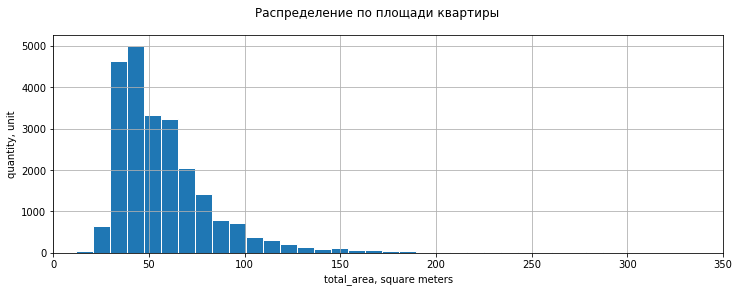

Cтатистические данные:


count   23650.000
mean       60.101
std        35.674
min        12.000
25%        40.000
50%        52.000
75%        69.000
max       900.000
Name: total_area, dtype: float64

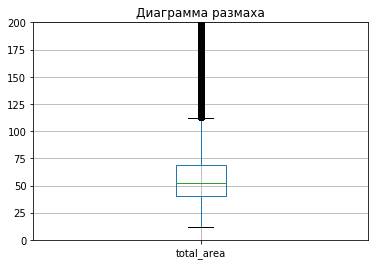

In [52]:
parameter_plots_stat(df, 'total_area', bins = 100, x_min = 0, x_max = 350, option = 1, ylim_min = 0, ylim_max = 200)

Размер квартир колеблется от 40 до 70 кв. метров. Больше всего продается квартир метражом около 40 кв. метров. 
Если и выбросы: квартиры размером от 120 кв. метров, есть и уникальный экземпляр - 900 кв. метров.

[В начало](#contents)

**4.1.2 Цена за метр** <a id="4_1_2"></a>

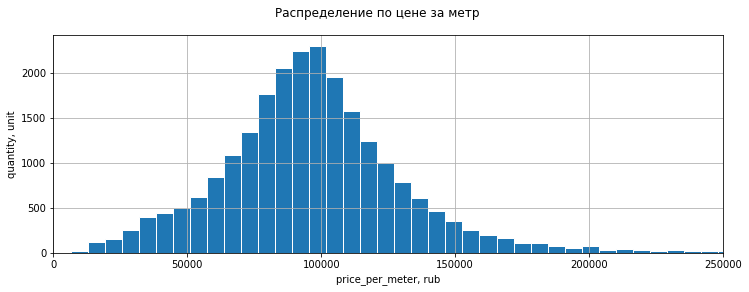

Cтатистические данные:


count     23650.000
mean      99884.534
std       50449.675
min         111.000
25%       77000.000
50%       95454.000
75%      114894.500
max     1907500.000
Name: price_per_meter, dtype: float64

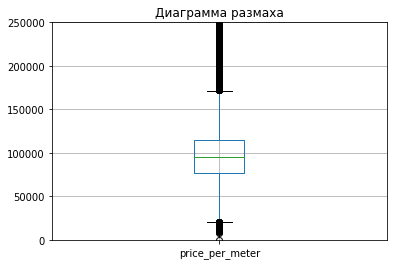

In [53]:
parameter_plots_stat(df, 'price_per_meter', bins = 300, x_min = 0, x_max = 250000, \
                     option = 1,ylim_min = 0, ylim_max = 250000)

Цена за квадратный метр колеблется в диапазоне от 77 000 руб. до 115 000 руб. Больше всего предложений со стоимостью метра около 100 000 руб. Есть выбросы как в сторону увеличения цены - от 175 000 руб. и до 1 миллиона, так и в сторону уменьшения - около 20 000 руб., и даже 12 000 руб. за кв. метр. 
Гистограмма имеет вид близкий к нормальному распределению.

[В начало](#contents)

**4.1.3 Количество комнат**  <a id="4_1_3"></a>

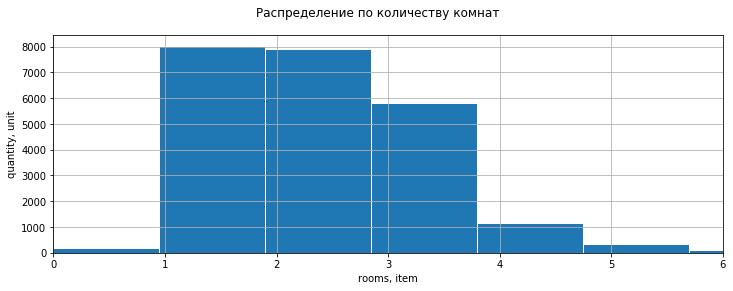

Cтатистические данные:


count   23650.000
mean        2.070
std         1.079
min         0.000
25%         1.000
50%         2.000
75%         3.000
max        19.000
Name: rooms, dtype: float64

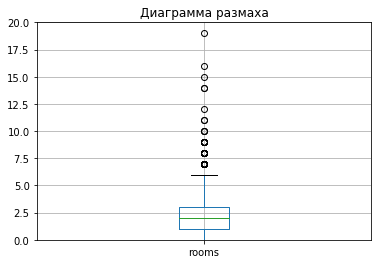

In [54]:
parameter_plots_stat(df, 'rooms', bins = 20, x_min = 0, x_max = 6, \
                     option = 1,ylim_min = 0, ylim_max = 20)

Больше всего объявлений о продаже 1-комнатных квартир, дальше в порядке уменьшения - 2х и 3х-комнатные квартиры. Значения с количеством комнат 0 - студии, их на рынке примерно так же мало, как и квартир с 5-6 комнатами. Все квартиры, где больше 7 комнат уже не стандарт и является выбросом для нашей выборки. 

[В начало](#contents)

**4.1.4 Высота потолков** <a id="4_1_4"></a>

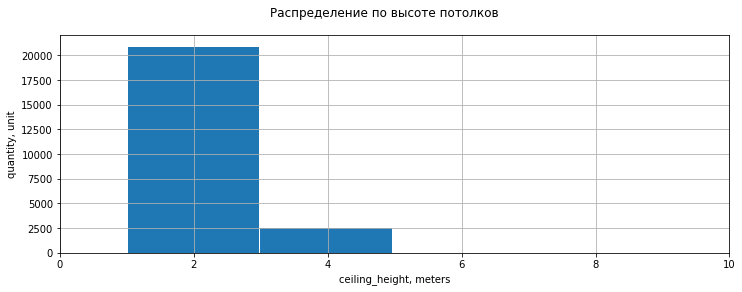

Cтатистические данные:


count   23650.000
mean        2.708
std         0.991
min         1.000
25%         2.600
50%         2.600
75%         2.700
max       100.000
Name: ceiling_height, dtype: float64

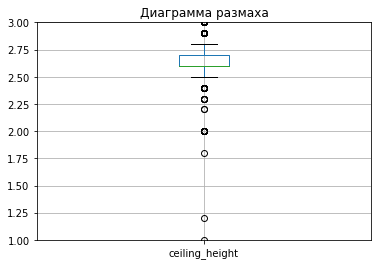

In [55]:
parameter_plots_stat(df, 'ceiling_height', bins = 50, x_min = 0, x_max = 10, \
                     option = 1,ylim_min = 1, ylim_max = 3)

В основном везде потолки 2,5-2,7 метров, что является нормой. Есть и 3х метровые, но это уже похоже на выброс. Также есть объявления с высотой потолков 1-1,2 метра... Скорее всего это опечатка... или какое-то очень нестандартное жилье...капсульный отель?..

[В начало](#contents)

**4.1.5 Время продажи квартиры.** <a id="4_1_5"></a>

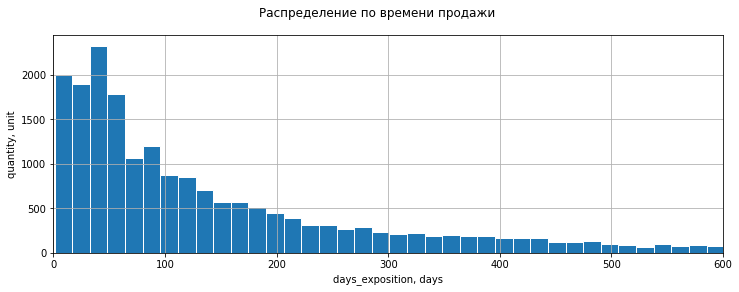

Cтатистические данные:


count   20470.000
mean      180.753
std       219.778
min         1.000
25%        45.000
50%        95.000
75%       231.000
max      1580.000
Name: days_exposition, dtype: float64

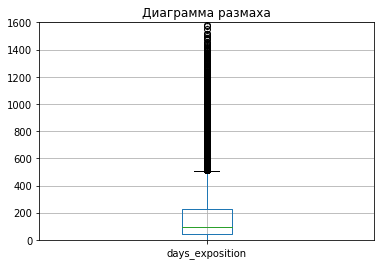

In [56]:
parameter_plots_stat(df, 'days_exposition', bins = 100, x_min = 0, x_max = 600, \
                     option = 1,ylim_min = 0, ylim_max = 1600)

Среднее время продажи составляет 180 дней, медиана - 95. Это говорит о большом количестве выбросов, что видно и на диаграмме размаха - скопление выбросов после 500 дней. 
Пик по количеству продаж приходится на 45-50 дней. Довольно много и продаж, закрытых, в первые 2-3 недели. Для продажи недвижимости это очень быстро. 
Есть и ооочень долгоиграющие объявления, которые провисели на сайте и больше года, и даже больше 4 лет (1580 дней)... Возможно это или ошибка в данных, произошедшая при выгрузке или очень неликвидная недвижимость. 

[В начало](#contents)

**4.2 Удаление редких и выбивающихся значений. Особенности** <a id="4_2"></a>

В предыдущем пункте мы изучили данные по площади продаваемого жилья, цене за квадратный метр, числу комнат и высоте потолков, а также времени продажи. В каждом случае есть выбросы и редкие, выбивающиеся значения. Избавимся от их, чтобы получить картину типичного объявления о продаже. Для этого отбросим данные, которые выше 95 процентилей (примерно граница "усов" для диаграммы размаха) для всех 4х показателей и ниже 5 процентилей для цены за метр и высоты потолков. 

In [57]:
df_for_analisis = (df
                   .query('total_area < total_area.quantile(0.95) and \
                   price_per_meter.quantile(0.05) < price_per_meter < price_per_meter.quantile(0.95) and \
                   ceiling_height.quantile(0.05) < ceiling_height < ceiling_height.quantile(0.95) and \
                   rooms < rooms.quantile(0.95) and days_exposition < days_exposition.quantile(0.95)'))    

print('Количество строк после удаления выбросов', len(df_for_analisis)) 

Количество строк после удаления выбросов 13337


Из 20 тысяч строк осталось 13,4 тысячи "типовых" наблюдений. Посмотрим еще раз на гистограммы после удаления выбросов.

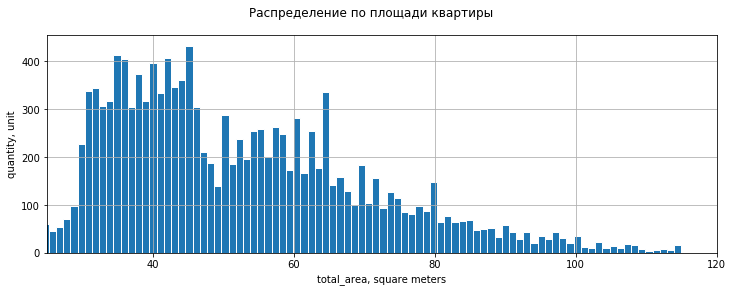

In [58]:
parameter_plots_stat(df_for_analisis, 'total_area', bins = 100, x_min = 25, x_max = 120, \
                     option = 0, ylim_min = 0, ylim_max = 200)

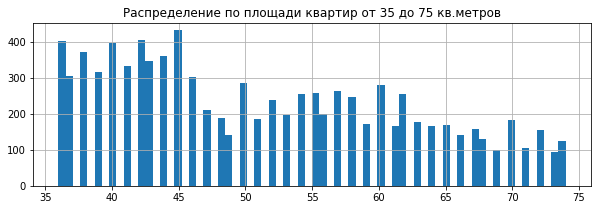

In [59]:
df_for_analisis.query('35<total_area<75')['total_area'].hist(bins=70, figsize=(10,3))
plt.title('Распределение по площади квартир от 35 до 75 кв.метров')
plt.show()

В типичных значениях есть свои пики: 37, 40, 45, 50 и 60 кв.метров - типовые размеры квартир многоэтажного строительства. 

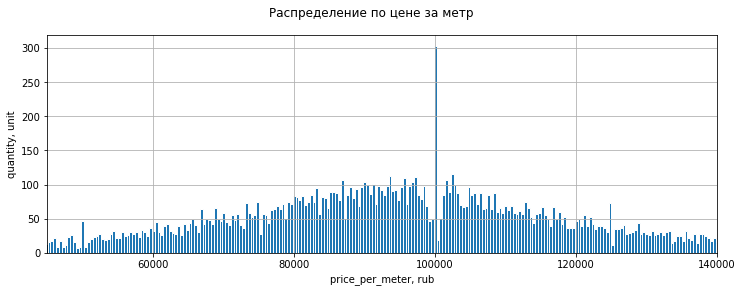

In [60]:
parameter_plots_stat(df_for_analisis, 'price_per_meter', bins = 300, x_min = 45000, x_max = 140000, \
                     option = 0, ylim_min = 0, ylim_max = 250000)

Гистограмма по цене за метр почти не изменилась, но теперь можно видеть, что 100000 руб. практически эталон среди расценок за метр, их намного больше, чем остальных.   

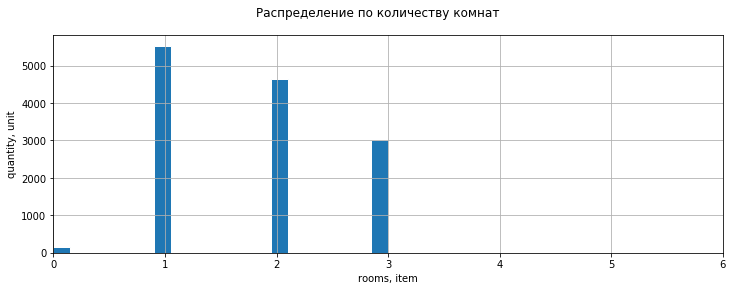

In [61]:
parameter_plots_stat(df_for_analisis, 'rooms', bins = 20, x_min = 0, x_max = 6, \
                     option = 0,ylim_min = 0, ylim_max = 20)

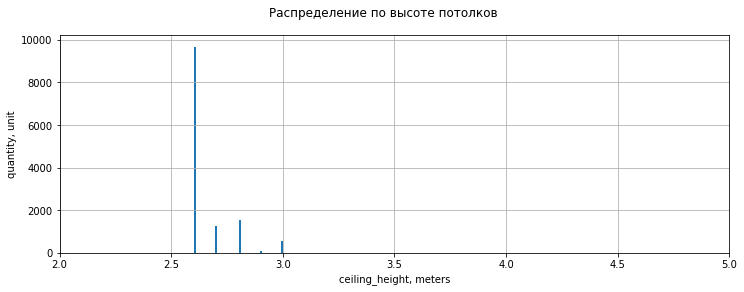

In [62]:
parameter_plots_stat(df_for_analisis, 'ceiling_height', bins = 30, x_min = 2, x_max = 5, \
                     option = 0,ylim_min = 0, ylim_max = 3)

По количеству комнат и высоте потолков ожидаемо остались только стандартные значения. 

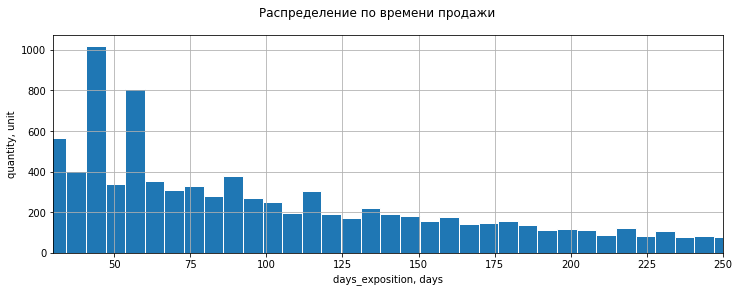

In [63]:
parameter_plots_stat(df_for_analisis, 'days_exposition', bins = 100, x_min = 30, x_max = 250, \
                     option = 0,ylim_min = 0, ylim_max = 1600)

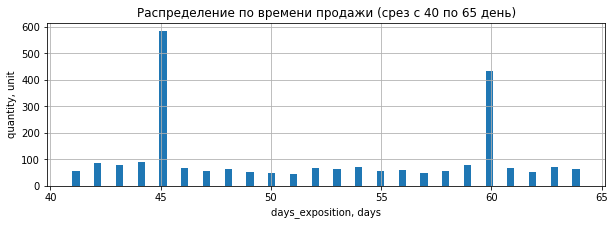

In [64]:
df_for_analisis.query('40<days_exposition<65')['days_exposition'].hist(bins=70, figsize=(10,3))
plt.title('Распределение по времени продажи (срез с 40 по 65 день)')
plt.xlabel('days_exposition, days')
plt.ylabel('quantity, unit')
plt.show()

Среди типичных значений есть свои пиковые значения. По гистограмме распределения по времени мы можем заметить, что в 45 и 60 дней - пиковые значения. Скорее всего на сайтах есть напоминания о не закрытых объявлениях и в это время происходит их автоматическое закрытие. 

[В начало](#contents)

**4.3 Влияние различных факторов на стоимость квартиры** <a id="4_3"></a>

In [65]:
#функция для построения графиков зависимости 
def dependence_plot(df, main_column, list_of_dependence):  
    for column in list_of_dependence:
        (df.groupby(column).agg({main_column:'median'})
         .plot(title=dependence_title_dict[column], figsize=(12, 4), grid=True, legend=False))
        plt.ylabel(main_column)
    plt.show()
    

# list_of_dependence:
# ['total_area', 'rooms', 'distance_to_center_km']
# ['floor_category']
# ['month_exposition', 'day_of_week_exposition', 'year_exposition']
    
    
# dependence_plot
# параметры: 
# df - название таблицы, 
# main_column - целевой показатель, по которому хотим рассчитать зависимости, 
# list_of_dependence - список столбцов, по которым хотим найти зависимость 

**4.3.1 Зависимость цены от площади, числа комнат, удалённости от центра**  <a id="4_3_1"></a>

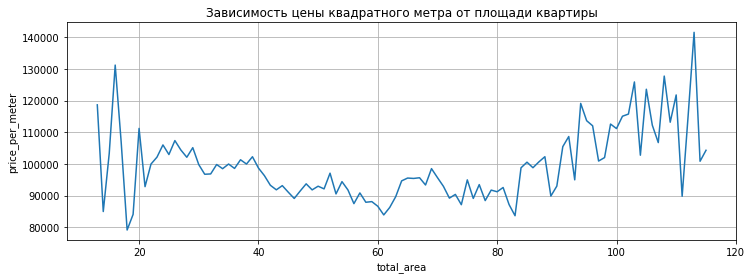

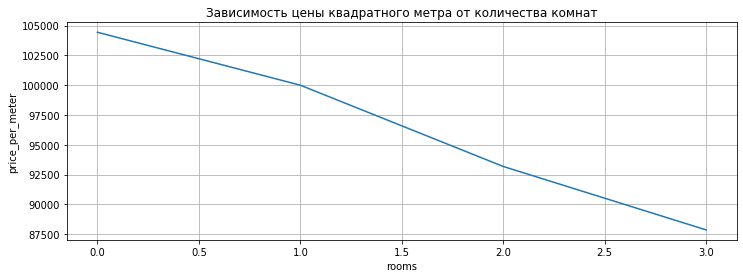

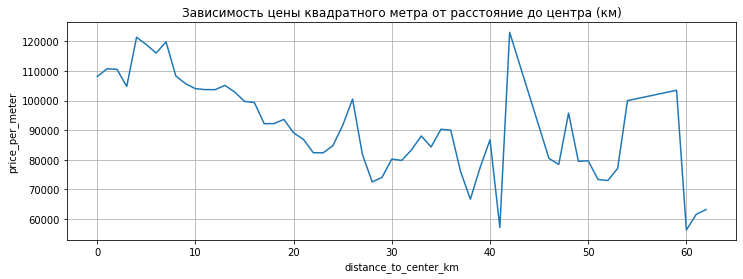

In [66]:
dependence_plot(df_for_analisis, 'price_per_meter', ['total_area', 'rooms', 'distance_to_center_km'])

Зависимость цены за кв.метр:
- от площади: если судить по графику, то видны резкие колебания в районе до 20 метров. Можно предположить, что в исторической части Петербурга много разношерстных по состоянию и исторической ценности квартир и они могут давать такой всплеск. Затем до 60-80 метров можно сказать, что цена постепенно снижается с увеличением метража. Затем от 88 метров начинается рост. Может быть это или новостройки, или бывшие коммунальные квартиры большого метража. 
- от количества комнат линейная, стоимость за метр в студии стоит почти 105000, в то время как, метр в 3х комнатной квартире около 88000 руб;
- от расстояния до центра линейная, от центра до 22-23 км цена за метр уменьшатся,

    затем в районе 25 км - рост. В этом радиусе находятся следующие населенные пункты: Сестрорецк, Сертолово, Кузьмоловский, Всеволожск, поселок имени Свердлова, Колпино, Пушкин, Красное Село, Петергоф. Вполне возможно, что рост стоимости обусловлен повышением спроса на жилье в пригороде, близком к городу.   
    
    затем резкий рост после 40 км от центра. В этом радиусе находятся следующие населенные пункты: Зеленогорск, Лесколово, пос. им. Морозова, Шлиссельбург, Кировск, Ульяновка, Гатчина. Судя по карте для Ленинградской области это довольно крупные населенные пункты, видимо этим обусловлен рост цены. 
    
Оценим так же диаграмму рассеяний по интересующим нас показателям.

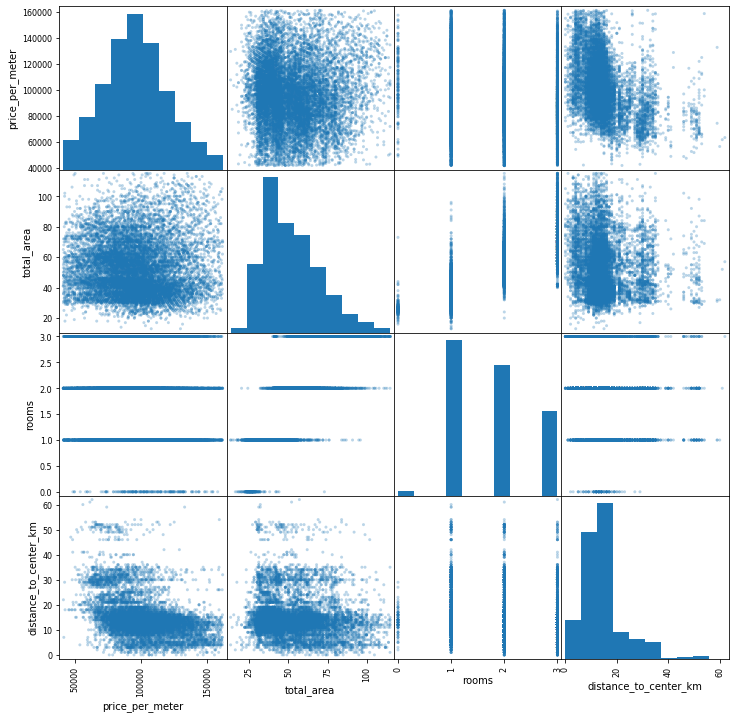

In [67]:
df_for_analisis_2 = df_for_analisis[['price_per_meter', 'total_area', 'rooms', 'distance_to_center_km']]

pd.plotting.scatter_matrix(df_for_analisis_2, alpha=0.3, figsize=(12, 12))
plt.show()

Так как наблюдений много, то по диаграмме в таком виде сложно ориентироваться, хотя определенные взаимосвязи можно оценить и по такой визуализации, но посмотрим на данные в более удобном виде. 

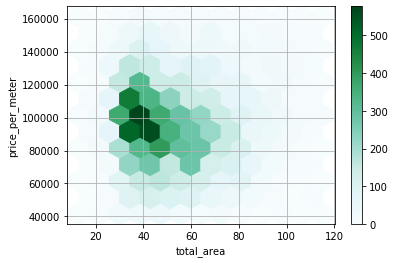

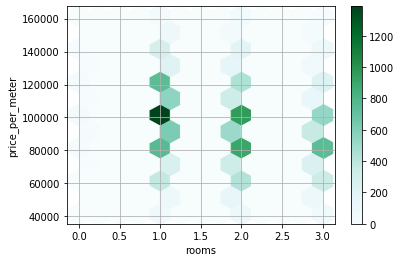

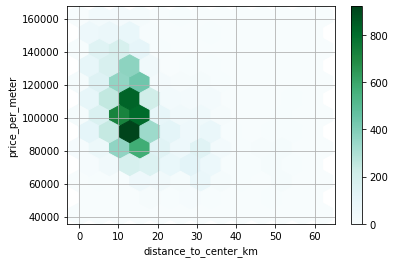

In [68]:
list_of_par = ['total_area', 'rooms', 'distance_to_center_km']

for col in list_of_par:
     df_for_analisis.plot(x=col, y='price_per_meter', kind='hexbin', gridsize=12, figsize=(6, 4), 
                            sharex=False, grid=True)
plt.show()

Чем больше общая площадь, тем дешевле стоит кв. метр жилья. Чаще других продают квартиры от 30 до 50 кв.метров, их на рынке больше остальных. Цена за метр таких квартир колеблется в диапазоне от 85 до 110 тысяч.  

Стоимость кв.метра дороже всего в однушках, потом в двушка, и последние - 3х-комнатные квартиры, но и предложений по однушкам больше. Предложений по студиям на рынке почти нет. Скорее всего этим можно объяснить резкие скачки цены за метр для площади до 20 кв.метров на графике выше. 

Больше всего предложений по продаже в районе 10-15 км от центра (черта города, до КАДа) по цене около 90000 руб. за кв.метр. Чем дальше от центра, тем дешевле, но и предложений меньше, что объясняется снижением плотности населения в области. При этом совсем в центре предложений тоже не много. Опять же объяснимо, ликвидная недвижимость, которой выгоднее владеть, чем продавать.

[В начало](#contents)

**4.3.2 Зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом** <a id="4_3_2"></a>

In [69]:
print('Коэффициент корреляции между ценой за метр и этажами:', 
      df_for_analisis['price_per_meter'].corr(df_for_analisis['floor']).round(2))

Коэффициент корреляции между ценой за метр и этажами: 0.22


Коэффициент говорит о том, что если зависимость и есть, то она не линейная. Проверим, построив график по сгруппированным данным.

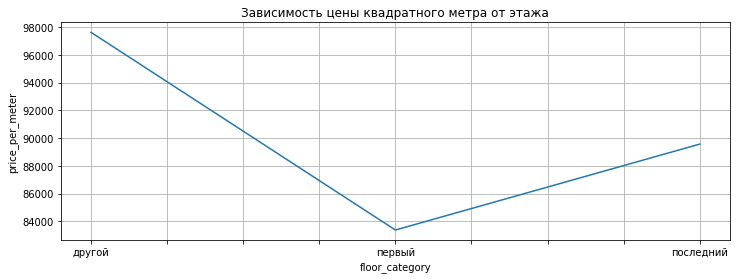

In [70]:
dependence_plot(df_for_analisis, 'price_per_meter', ['floor_category'])

Корреляция есть! На графике видно, что дешевле всего стоят квартиры на первых этажах, порядка 84000 руб., чуть дороже - на последнем, около 89000 руб. Как и ожидалось, на остальных этажах цена за метр выше. 

[В начало](#contents)

**4.3.3 Зависимость цены от даты размещения: дня недели, месяца и года** <a id="4_3_3"></a>

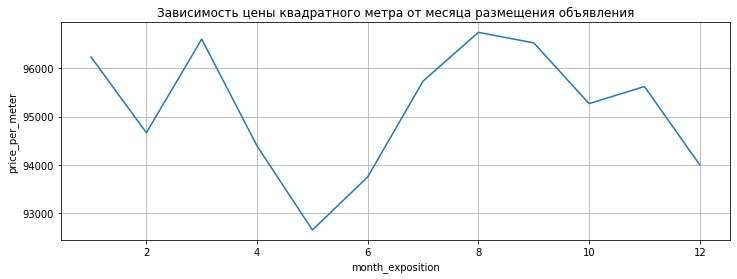

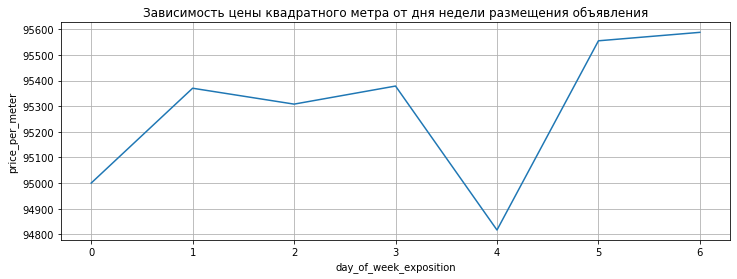

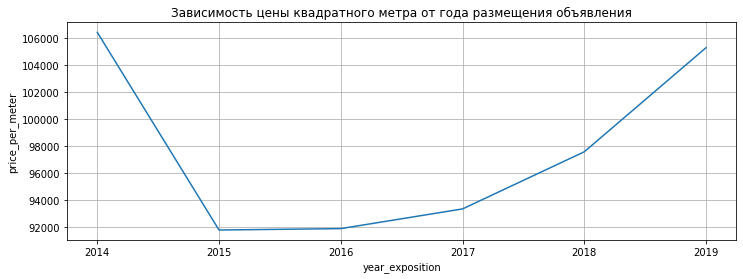

In [71]:
dependence_plot(df_for_analisis, 'price_per_meter', ['month_exposition', 'day_of_week_exposition', 'year_exposition'])

**Зависимость цены кв.метра от месяца размещения** 
Прослеживается небольшая зависимость: в первой половине года стоимость немного падает, к осени - растет. Максимум приходится на конец 1го квартала (март) и вторую половину 3го (август - сентябрь) - 97 тысяч рублей, дешевле всего в мае - порядка 92 - 93 тысяч рублей. 
Может быть такие колебания связаны с количеством объявлений на рынке недвижимости. С  середины весны и до начала осени обычно происходит спад активности в связи с дачным сезоном и сезоном отпусков.  

**Зависимость цены кв.метра от дня недели размещения**
Минимум: 94850 руб., а максимум 95600 руб., т.е. на смотря на резкие скачки на графике, цифры говорят нам об отсутствии зависимости.  

**Зависимость цены кв.метра от года размещения**
В 2014 году явно у петербуржцев было больше денег на покупку дорогих квартир *шутка* 
Скорее всего спад стоимости кв. метра связан с очередным экономическим кризисом 2014 года и снижением покупательной способности населения, а также ажиотажем на покупку в сам период кризиса. 2015-2016 года были самыми тяжелыми для рынка недвижимости. Затем наблюдается плавный рост. Рост в некоторой степени можно объяснить и ростом инфляции.

[В начало](#contents)

**4.4 10 населённых пунктов с наибольшим числом объявлений.**
<a id="4_4"></a>

Выделим топ-10 населенных пунктов с самым большим количеством объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах и выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья.

In [72]:
df_group_of_location = ((df_for_analisis.groupby('locality_name')
                        .agg({'total_area': 'count', 'price_per_meter': 'mean', 'last_price':['min', 'max']}))
                        .round(2)
                        .sort_values(by=('total_area', 'count'), ascending=False)
                        .reset_index()
                       )

df_group_of_location.columns = ['locality_name', 'number_of_ads', 'average_cost_per_meter',\
                                'min_last_price', 'max_last_price']

df_group_of_location['part_of_number_ads'] = (
    (df_group_of_location['number_of_ads']/len(df_group_of_location['number_of_ads'])).round(2)
)

In [73]:
top10 = df_group_of_location.loc[:9]
display(top10)

,locality_name,number_of_ads,average_cost_per_meter,min_last_price,max_last_price,part_of_number_ads
0,санкт-петербург,8833,105499.130,1190000,16512000,55.210
1,мурино,519,86537.140,1730000,7940000,3.240
2,кудрово,415,95115.910,1800000,10500000,2.590
3,шушары,357,78393.340,1500000,8179000,2.230
4,всеволожск,278,68007.830,965780,10890000,1.740
5,парголово,277,90224.450,1400000,9140000,1.730
6,пушкин,197,102380.710,1990000,16912000,1.230
7,гатчина,187,69287.670,1500000,9500000,1.170
8,колпино,185,75556.640,2100000,12750000,1.160
9,выборг,135,59564.900,1050000,7200000,0.840


In [74]:
top10.set_index('locality_name', inplace=True)

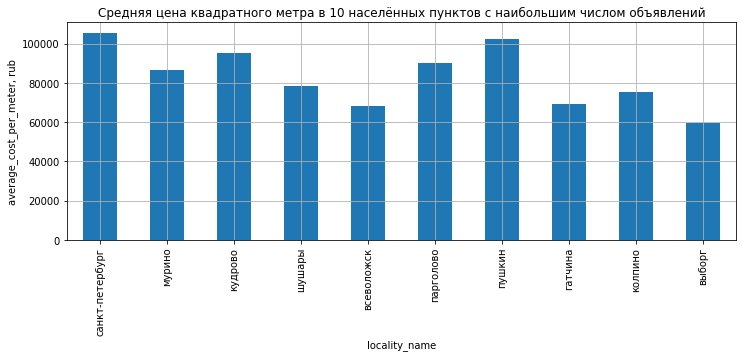

In [75]:
top10.plot(y='average_cost_per_meter', kind='bar', grid=True, legend=False, figsize=(12, 4))
plt.title('Средняя цена квадратного метра в 10 населённых пунктов с наибольшим числом объявлений')
plt.ylabel('average_cost_per_meter, rub')
plt.show()

In [76]:
print('Населеный пункт с самой низкой стоимостью жилья')
top10.query('min_last_price == min_last_price.min()')

Населеный пункт с самой низкой стоимостью жилья


,number_of_ads,average_cost_per_meter,min_last_price,max_last_price,part_of_number_ads
locality_name,,,,,
всеволожск,278,68007.830,965780,10890000,1.740


In [77]:
print('Населеный пункт с самой высокой стоимостью жилья')
top10.query('max_last_price == max_last_price.max()')

Населеный пункт с самой высокой стоимостью жилья


,number_of_ads,average_cost_per_meter,min_last_price,max_last_price,part_of_number_ads
locality_name,,,,,
пушкин,197,102380.710,1990000,16912000,1.230


55 % объявление приходится на Санкт-Петербург, что ожидаемо, т.к. плотность застройки в городе больше, чем в области. 
В топ-10 по количеству объявлений вошли населенные пункты, расположенные:
-рядом с КАДом: Мурино, Кудрово, Шушары, Парголово. 
-расположенные в 25 и 40 км от города, где цена за метр была выше: Всеволожск, Пушкин, Колпино и Гатчина. 
Закрывает 10ку - Выборг - город, рядом с Финляндией :)

Примечательно, что самая высокая цена за квартиру оказалась не в Петербурге, а в Пушкине, 16,91 млн., а самая низкая во Всеволожск - 0,965 млн.  
Но средняя цена за квадратный метр всё же, ожидаемо, самая высокая в Петербурге, затем уже только в Пушкине, в районе КАДа, закрывает 10ку опять Выборг.  


[В начало](#contents)

**4.5 Изучение данных по центру Санкт-Петербурга** <a id="4_5"></a>

Выделяем из таблицы данные, относящиеся только к Санкт-Петербургу:

In [78]:
df_spb = df_for_analisis.query('locality_name == "санкт-петербург"')
display(df_spb.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,days_exposition_null,ratio_living_and_total_area,ratio_kitchen_and_total_area,distance_to_center_km,price_per_meter,day_of_week_exposition,month_exposition,year_exposition,floor_category
2,10,5196000,56,2015-08-20,2,2.600,5,34.300,4,False,...,558.000,0,0.610,0.150,13.000,92785,3,8,2015,другой
4,2,10000000,100,2018-06-19,2,3.000,14,32.000,13,False,...,121.000,0,0.320,0.410,8.000,100000,1,6,2018,другой
10,5,5050000,39,2017-11-16,1,2.700,12,20.300,3,False,...,137.000,0,0.520,0.220,13.000,129487,3,11,2017,другой
15,16,4650000,39,2017-11-18,1,2.600,14,20.500,5,False,...,19.000,0,0.530,0.190,14.000,119230,5,11,2017,другой
16,11,6700000,82,2017-11-23,3,3.000,5,55.600,1,False,...,397.000,0,0.680,0.110,10.000,81707,3,11,2017,первый


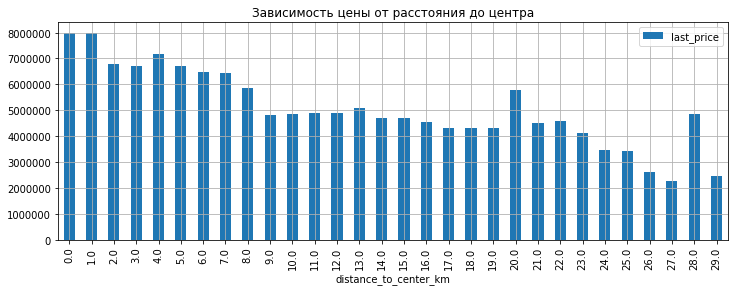

In [79]:
(df_spb
 .pivot_table(index='distance_to_center_km', values='last_price', aggfunc='median').round(0)
 .plot(kind='bar', figsize=(12, 4), grid=True, legend=True, title = 'Зависимость цены от расстояния до центра'))
plt.show()
    

Спад стоимости происходит на 2 км и на 9 км от центра. 1 км совсем маленький радиус для центра города, поэтому определим центром города радуисе в 8 км. 

In [80]:
df_spb.query('distance_to_center_km == 0').loc[:, ['city_centers_nearest', 'distance_to_center_km']]

,city_centers_nearest,distance_to_center_km
1104,743.000,0.000
1335,830.000,0.000
1876,936.000,0.000
2609,399.000,0.000
2988,467.000,0.000
3800,472.000,0.000
5747,515.000,0.000
6934,671.000,0.000
7467,996.000,0.000
8619,867.000,0.000


In [81]:
# выделение сегмета квартир в центре
df_center = df_spb.query('distance_to_center_km <= 8')

[В начало](#contents)

**4.5.1  Изучение параметров: площадь, цена, число комнат, высота потолков по центру Санкт-Петербурга** <a id="4_5_1"></a>

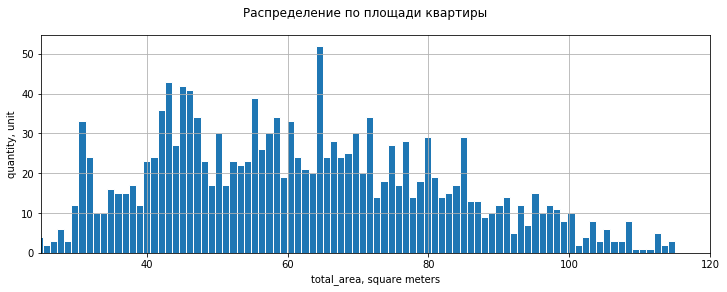

Cтатистические данные:


count   1574.000
mean      61.880
std       20.118
min       13.000
25%       46.000
50%       60.000
75%       76.750
max      115.000
Name: total_area, dtype: float64

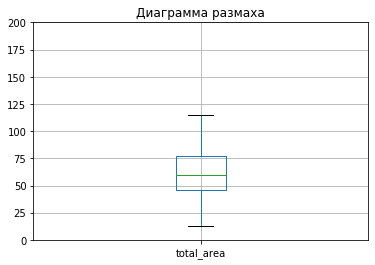

In [82]:
parameter_plots_stat(df_center, 'total_area', bins = 100, x_min = 25, x_max = 120, \
                     option = 1, ylim_min = 0, ylim_max = 200)

В центре города довольно много предложений по продаже квартир площадью около 60 метров. Предложения по продаже в основном в диапазоне от 46 до 76 кв.метров. 

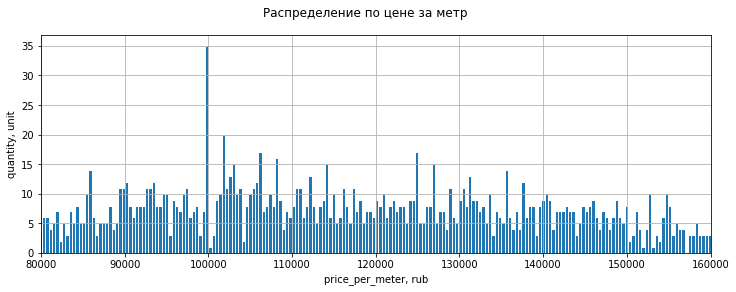

Cтатистические данные:


count     1574.000
mean    115508.906
std      22769.229
min      41911.000
25%      97860.750
50%     114035.000
75%     133613.500
max     161282.000
Name: price_per_meter, dtype: float64

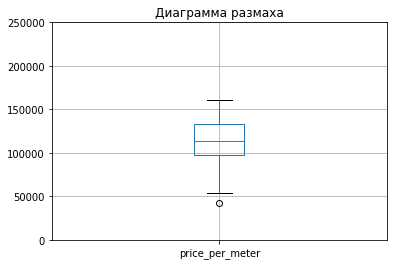

In [83]:
parameter_plots_stat(df_center, 'price_per_meter', bins = 300, x_min = 80000, x_max = 160000, \
                     option = 1, ylim_min = 0, ylim_max = 250000)

Цена за метр в центре, конечно, выше, чем по городу - 115 000 руб. Цена колеблются в интервале от 95 000 ру. до 133 000 руб. 

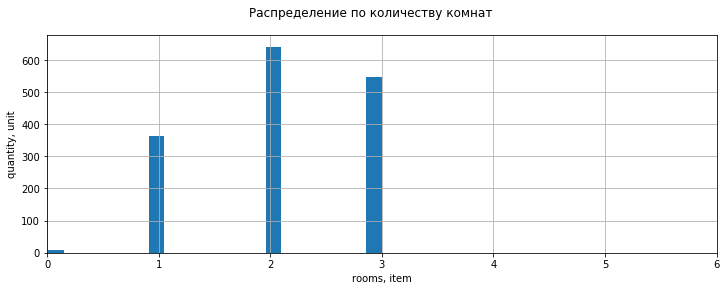

In [84]:
parameter_plots_stat(df_center, 'rooms', bins = 20, x_min = 0, x_max = 6, \
                     option = 0,ylim_min = 0, ylim_max = 20)

Больше предложений о продаже 2х-комнатных квартир, затем - 3х и 1-комнатных. Студий почти нет, их в центре выгоднее сдавать гостям города, чем продавать. 

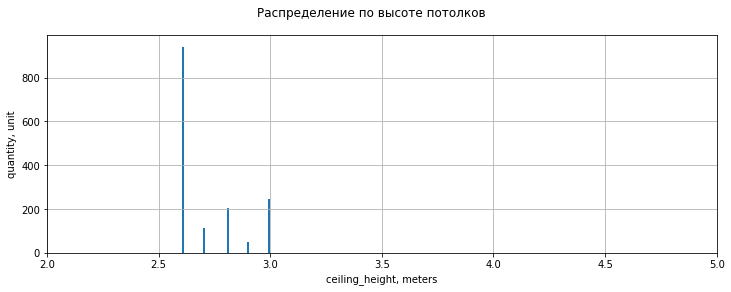

In [85]:
parameter_plots_stat(df_center, 'ceiling_height', bins = 30, x_min = 2, x_max = 5, \
                     option = 0,ylim_min = 0, ylim_max = 3)

Много квартир со стандартной высотой потолка 2,7, но 3х метровых больше, чем по городу в целом. 

[В начало](#contents)

**4.5.2 Зависимость цены от различных параметров по центру Санкт-Петербурга** <a id="4_5_2"></a>

**-площадь, число комнат, удалённость от центра**<a id="4_5_2_1"></a>

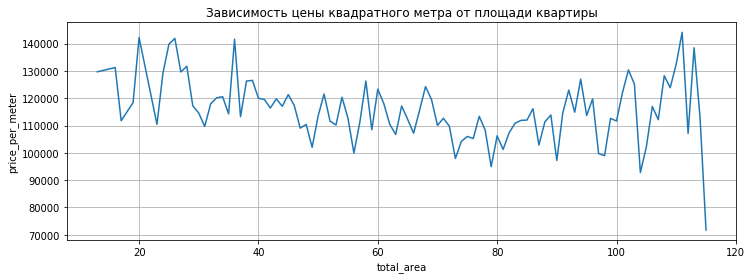

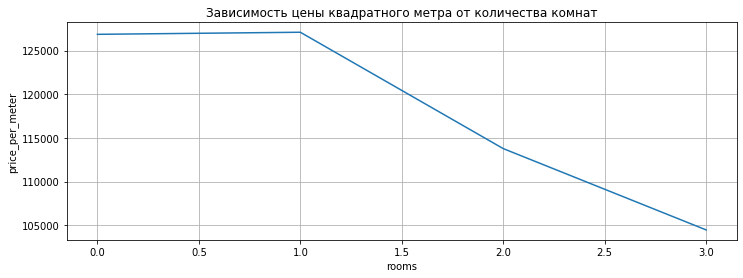

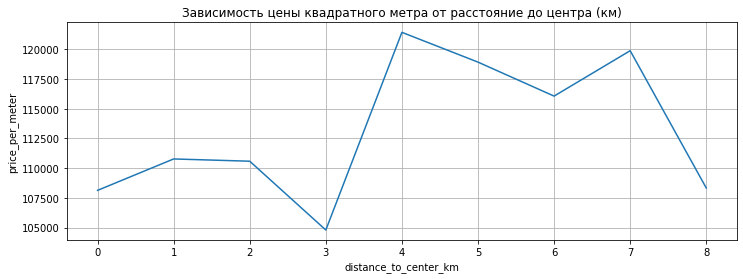

In [86]:
dependence_plot(df_center, 'price_per_meter', ['total_area', 'rooms', 'distance_to_center_km'])

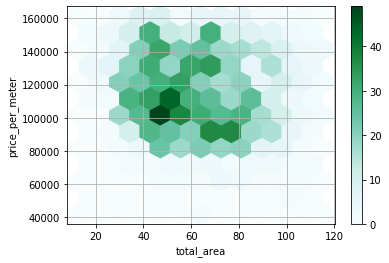

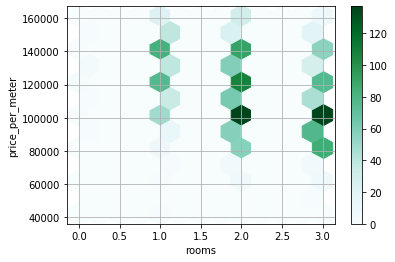

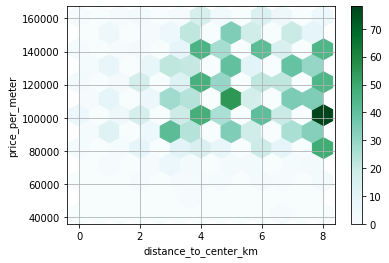

In [87]:
list_of_par = ['total_area', 'rooms', 'distance_to_center_km']

for col in list_of_par:
     df_center.plot(x=col, y='price_per_meter', kind='hexbin', gridsize=12, figsize=(6, 4), 
                            sharex=False, grid=True)
plt.show()

Чем больше общая площадь, тем дешевле стоит кв. метр жилья. Разброс цены за метр относительно площади больше, чем по городу и области, предложения достаточно равномерно распределены в диапазоне от 95 000 до 130 000 руб. для метража от 45 до 70-80 кв.метров. 

Стоимость метра в зависимости от количества комнат резко снижается с 127 000 руб. до студию или однушку до 113 000 руб. за двушку и 104 000 руб. за трёшку. Видимо их не так выгодно и удобно сдавать. При этом предложений по продаже 2х и 3х комнатных квартир больше, чем 1-комнатных. 

Чем дальше от центра, тем больше предложений. Диапазон цен примерно одинаковый, от 100 000 до 120 000 руб., причем до 3 км от центра стоимость квартир ниже, чем после 3 км. Возможно, что в этой части Петербурга нет квартир в стандартном понимании настоящего времени, поэтому они не столь популярны.  

 [В начало](#contents)
 
 **- зависимость цены от того, на каком этаже расположена квартира**<a id="4_5_2_2"></a>

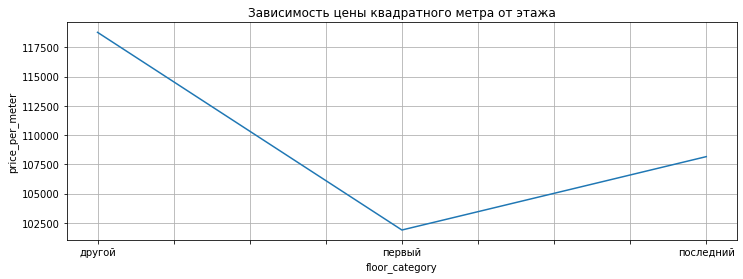

In [88]:
dependence_plot(df_center, 'price_per_meter', ['floor_category'])

Зависимость от этажа аналогична данным по области, только стоимость за метр, естественно, выше. 

[В начало](#contents)

**- зависимость цены от даты размещения: дня недели, месяца и года**<a id="4_5_2_3"></a>

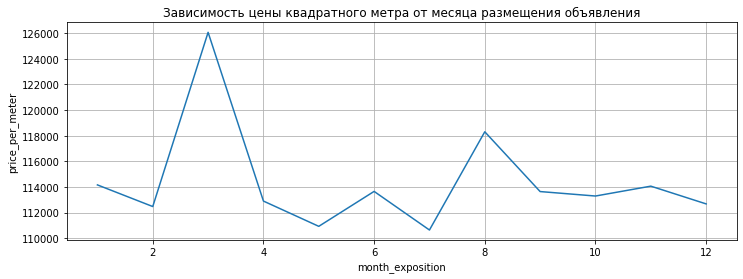

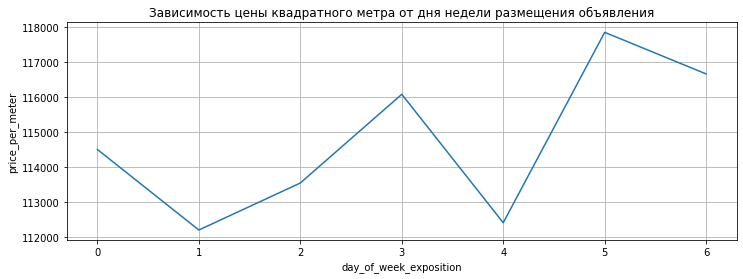

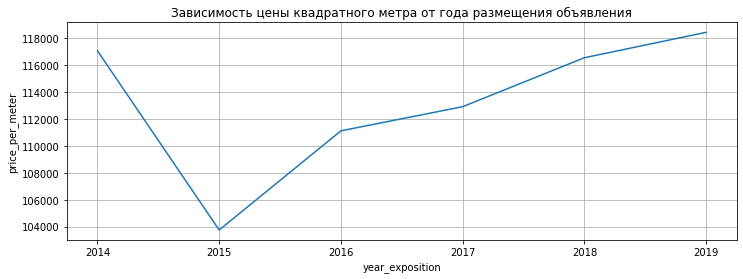

In [89]:
dependence_plot(df_center, 'price_per_meter', ['month_exposition', 'day_of_week_exposition', 'year_exposition'])

Зависимость цены кв.метра от месяца размещения
Аналогично данным по городу и области Прослеживается небольшая зависимость: в первой половине года стоимость немного падает, к осени - растет. Большая стоимость в марте - 126 000 руб., чуть меньше в августе - 118 000 руб., минимум летом - 110 000 руб. 

Зависимость цены кв.метра от дня недели размещения
Минимум: 112000 руб. во вторник, а максимум 118000 руб. в пятницу. Разница в пределах 5 %, при этом цена скачет в течение недели между этими показателями. Вполне возможно, что такие скачки можно объяснить спецификой рынка в центре, если изучить этот вопрос глубже, т.к. теория о том, что в пятницу одна и та же квартира будет стоить дороже, чем во вторник звучит не очень правдоподобно... Надо изучать подробнее, возможно есть своя специфика рынка в исторической части города.    

Зависимость цены кв.метра от года размещения
Так же спад с 2014 и подъем с 2015, но более резкий и быстрый, чем по городу и области, нет "застоя" с 2015 по 2016 гг. За 4 года цена за метр поднялась с 104 000 руб. до 118 000 руб. 

[В начало](#contents)

**4.6 Сравнение параметров и зависимостей по Санкт-Петербургу в целом и центру по Санкт-Петербургу в целом и центру**<a id="4_6"></a>

In [90]:
# функция для отрисовки графиков сравнения по общему параметру для 2х таблиц
def parameter_plots_for_compare(df1, df2, column, bins, x_min, x_max, legend):
    ax = plt.gca()    
    df1.plot(y = [column], kind='hist', figsize=(18, 6), grid=True,
                  histtype='step', linewidth=3,
                  bins=bins,  xlim=(x_min, x_max), 
                  title=parameter_title_dict[column],
                  ax=ax, color='green')
    df2.plot(y = [column], kind='hist', figsize=(18, 6), grid=True, 
             histtype='step', linewidth=3,
             bins=bins,  xlim=(x_min, x_max), 
             ax=ax)
    plt.legend(legend)
    plt.xlabel(parameter_unit_dict[column])
    plt.ylabel('quantity, unit')
    plt.show()

**4.6.1 Сравнение параметров: площадь, цена, число комнат, высота потолков**<a id="4_6_1"></a>

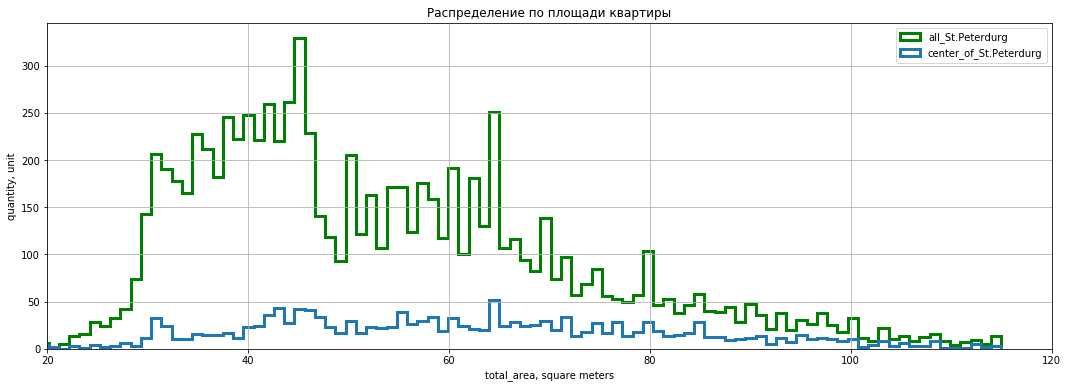

In [91]:
parameter_plots_for_compare(df_spb, df_center, 'total_area', bins=100, x_min=20, x_max=120, 
                            legend=['all_St.Peterdurg','center_of_St.Peterdurg'])

Очертания графиков схожи, что говорит о том, что распределение по площади квартир по городу и центру аналогичны. Естественно, что предложений в целом по городу намного больше, чем в центре.  

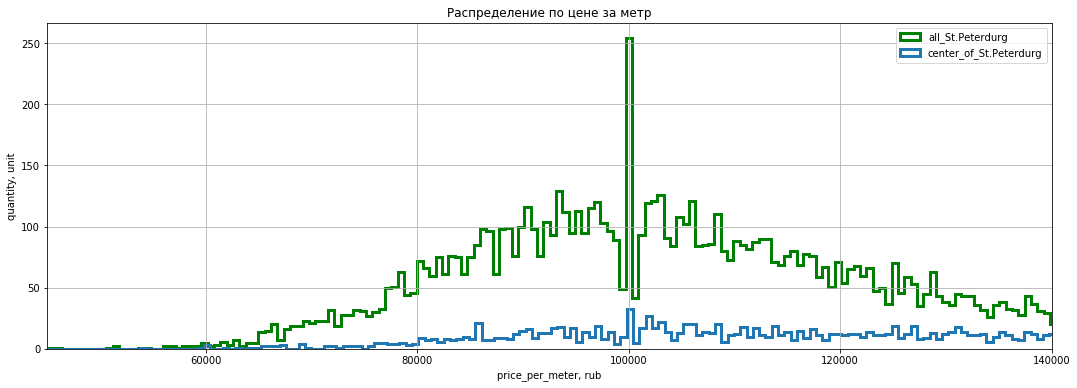

In [92]:
parameter_plots_for_compare(df_spb, df_center, 'price_per_meter', bins=200, x_min=45000, x_max=140000, 
                            legend=['all_St.Peterdurg','center_of_St.Peterdurg'])

В графика по распределению цены за метр также читаются схожие очертания. 

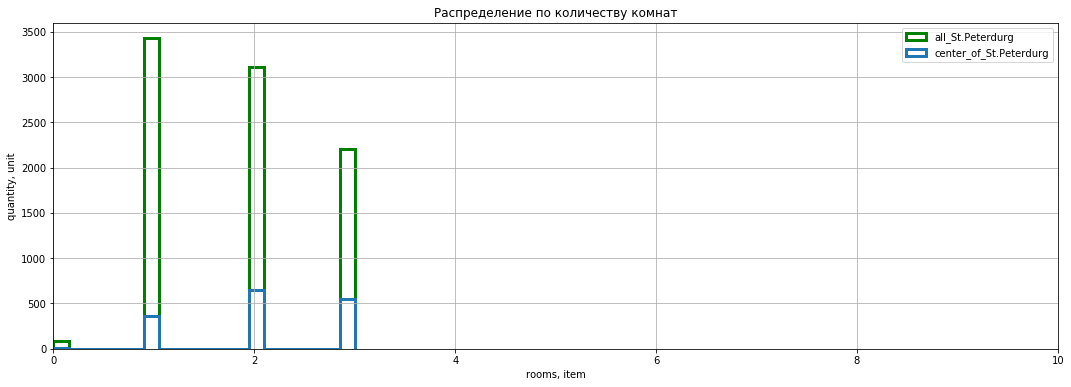

In [93]:
parameter_plots_for_compare(df_spb, df_center, 'rooms', bins=20, x_min=0, x_max=10, 
                            legend=['all_St.Peterdurg','center_of_St.Peterdurg'])

Доля предложений по продаже 2х комнатных квартир в центре больше, чем по городу в целом. По городу больше объявлений о продаже 1-комнатных квартир. 

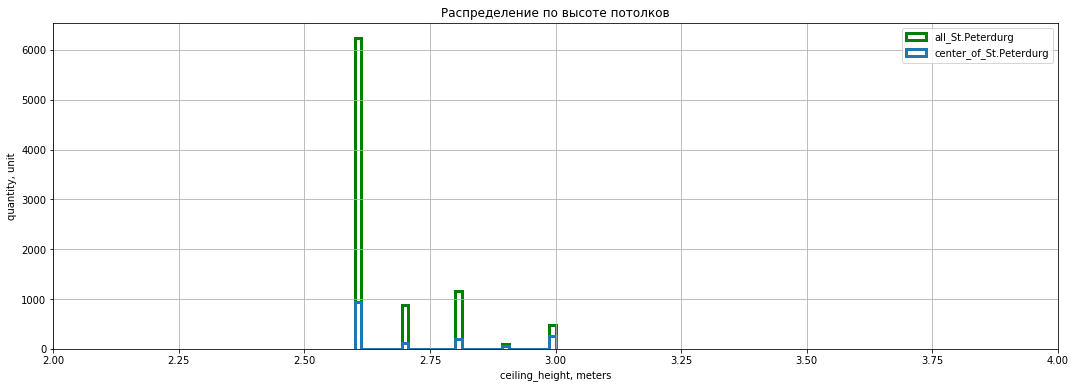

In [94]:
parameter_plots_for_compare(df_spb, df_center, 'ceiling_height', bins=30, x_min=2, x_max=4, 
                            legend=['all_St.Peterdurg','center_of_St.Peterdurg'])

По городу подавляющее количество предложений с высотой потолка 2,7, что и понятно, т.к. это стандартный размер. Половина предложений с 3х метровыми потолками - в центре. 

[В начало](#contents)

**4.6.2 Сравнение зависимости цены от различных параметров**<a id="4_6_2"></a>

In [95]:
# функция для сравнения графиков зависимости по 2 таблицам
def dependence_plots_for_compare(df1, df2, main_column, list_of_dependence, legend):
    for column in list_of_dependence:
        ax = plt.gca()
        (df1.groupby(column).agg({main_column:'median'})
         .plot(title=dependence_title_dict[column], figsize=(18, 6), grid=True, ax=ax, color='green'))
        (df2.groupby(column).agg({main_column:'median'})
         .plot(title=dependence_title_dict[column], figsize=(18, 6), grid=True, ax=ax))
        plt.ylabel(main_column)
        plt.legend(legend)
        plt.show()
    
    
# list_of_dependence:
# ['total_area', 'rooms', 'distance_to_center_km']
# ['floor_category']
# ['month_exposition', 'day_of_week_exposition', 'year_exposition']

# параметры: 
# df - название таблицы, 
# main_column - целевой показатель, по которому хотим рассчитать зависимости, 
# list_of_dependence - список столбцов, по которым хотим найти зависимость 

[В начало](#contents)

**- площадь, число комнат, удалённость от центра**<a id="4_6_2_1"></a>

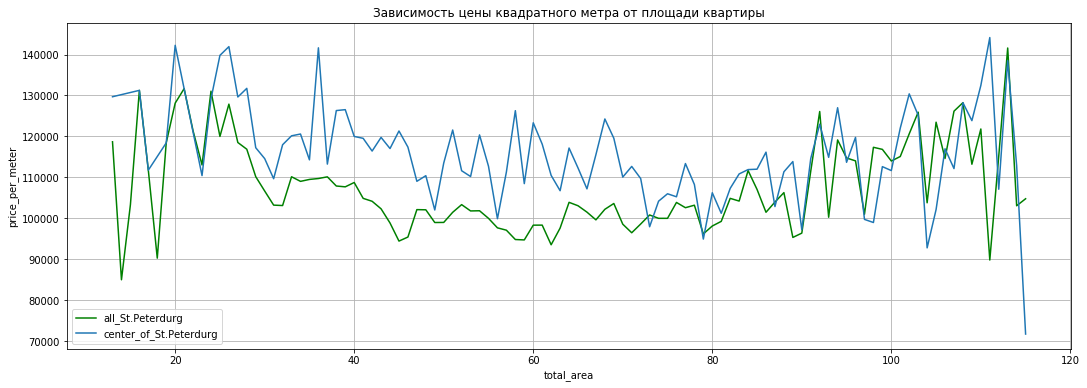

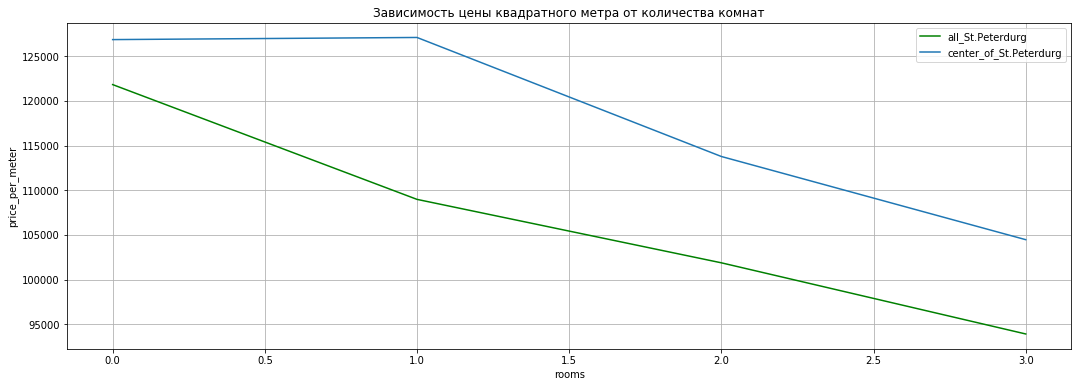

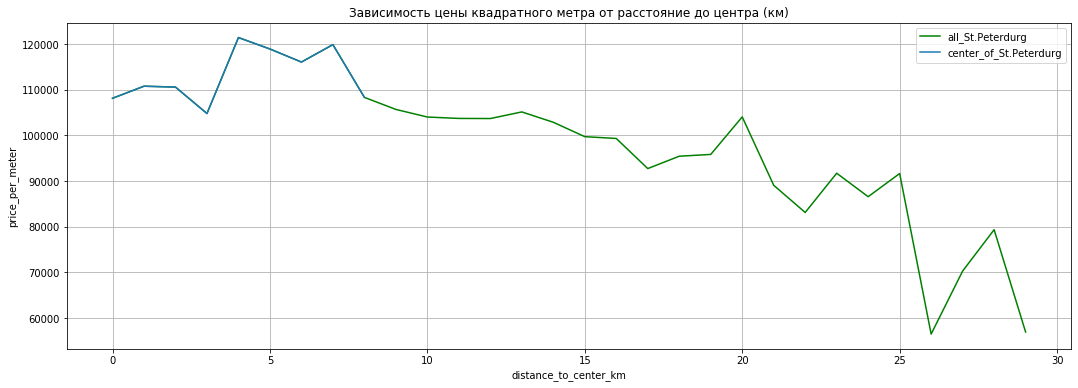

In [96]:
dependence_plots_for_compare(df_spb, df_center, 'price_per_meter', ['total_area', 'rooms', 'distance_to_center_km'], 
                             legend=['all_St.Peterdurg','center_of_St.Peterdurg'])

Цена за метр в зависимости от общей площади: для всех размеров квартир до 90 кв.метров цена в центре выше цены в остальной части города. После 90 метров цена за метр уравнивается.  

Зависимость цены за метр от количества комнат и в центре и в общем по городу - линейная, в центре, естественно, цена за метр будет выше, чем по городу. 

С удаленностью от центра цена за метр падает. Как отмечали ранее в самом центре (до 3 км) стоимость ниже, чем в радиусе от 3 до 8 км. 

[В начало](#contents)

**- зависимость цены от того, на каком этаже расположена квартира**<a id="4_6_2_2"></a>

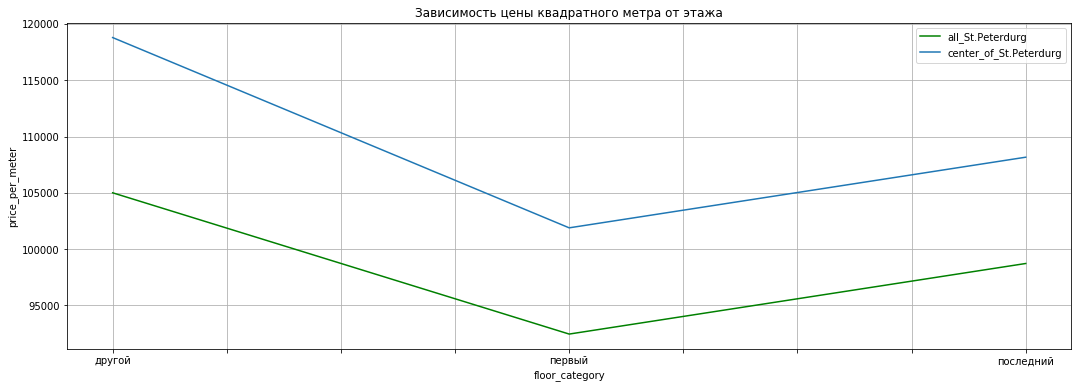

In [97]:
dependence_plots_for_compare(df_spb, df_center, 'price_per_meter', ['floor_category'], 
                             legend=['all_St.Peterdurg','center_of_St.Peterdurg'])

Опять цена в центре ожидаемо выше. Интересно, что дельта практически одинаковая для всех типов: 10 - 13 тысяч рублей. 

[В начало](#contents)

**- зависимость цены от даты размещения: дня недели, месяца и года**<a id="4_6_2_3"></a>

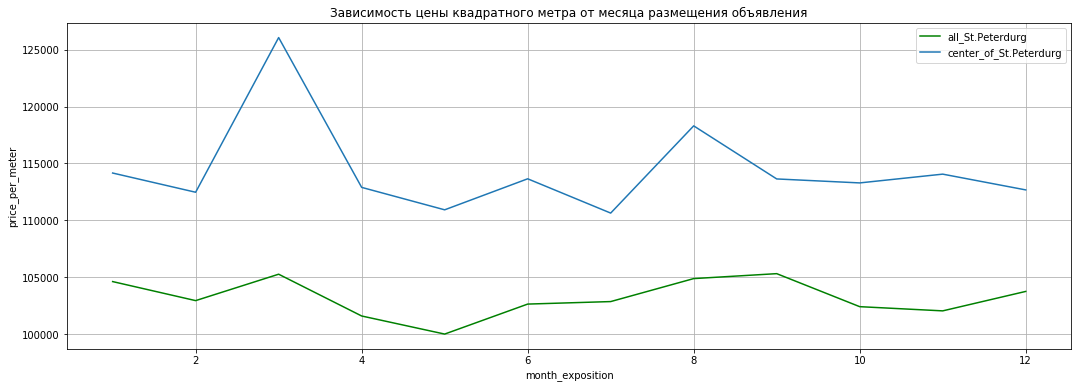

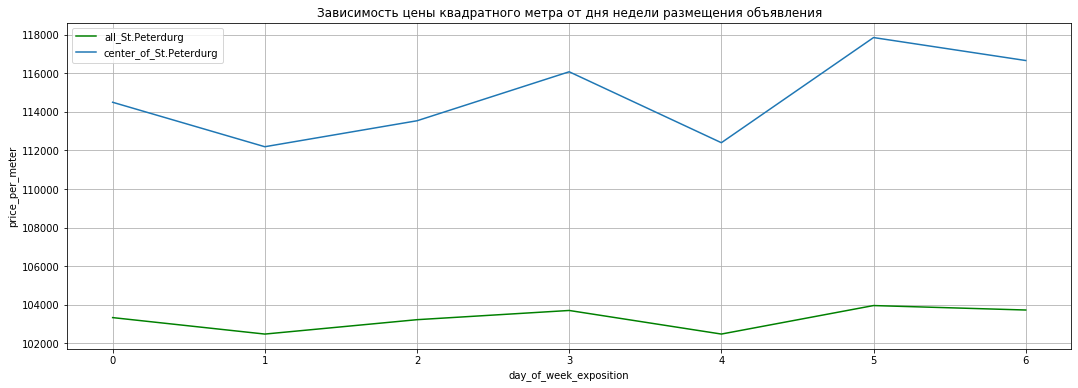

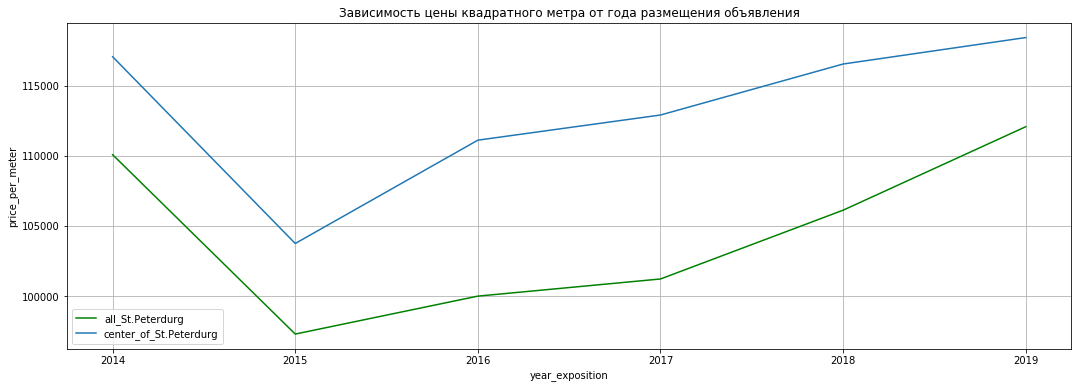

In [98]:
dependence_plots_for_compare(df_spb, df_center, 'price_per_meter', 
                             ['month_exposition', 'day_of_week_exposition', 'year_exposition'], 
                             legend=['all_St.Peterdurg','center_of_St.Peterdurg'])

Скачки в цене в течение года более выражены в центре города. 
Изменение цены в течение недели совсем не выражено для города в целом, немного выражение для центра, но с учетом более высоких цен можно сказать, что изменение незначительное. 
Как и отмечали ранее, продажи в центре города быстрее начали расти после кризиса 2014 года. 

[В начало](#contents)

## 5. Общий вывод <a id="conclusion"></a>

**Типичные показатели:**
Площадь квартиры: от 40 до 60 кв.метров, 
Цена за метр: 100 000 руб., от 77 000 до 115 000 руб.
Больше всего объявлений о продаже 1-комнатных квартир,
Стандартная высота потолка: от 2,7 до 3,0.
Больше всего закрытых объявлений в 45 и 60 дней. Скорее всего это автоматическое закрытие объявлений. Но если нет дубликатов, то видимо всё же продажи состоялись в данный промежуток времени. 

**Взаимосвязь  цены за квадратный метр и показателей** 

Чем больше общая площадь, тем дешевле стоит кв. метр жилья. Много предложение по квартирам стандартных размеров: от 40 до 60 кв.метров, высоким спросом обусловлена высокая цена за квадратные метр - около 100 000 руб.  

Стоимость кв.метра дороже всего в однушках (~ 80 000 - 120 000 руб.), потом в двушка (~ 80 000 - 100 000), и последние - 3х-комнатные квартиры (~ 80 000 руб.). Предложений по студиям на рынке почти нет, при этом стоимость метра в студии выше, чем в однокомнатных квартирах.

Чем дальше от центра, тем дешевле, но и предложений меньше. При этом совсем в центре предложений тоже не много. В основном предложения от 85 000 руб. до 120 000 руб. в 10-15 км от центра, т.е. в черте города, до КАДа.  В области цена растет в населенных пунктах в 25 и 40 км от города, например,  Пушкине, Всеволожске, Гатчине. 

Ожидаемо, цена за квартиры на первом и последнем этажах ниже, чем на других. 98 000 руб. против 84 000 - 90 000 руб. 

В течение года цена за метр колеблется от 97 000  (1 и 3 кварталы) до 92 000 руб. (2 квартал). Скорее всего такие колебания связаны с сезонностью рынка недвижимости, конец весны и лето традиционно «мертвый» сезон из-за дачного сезона и отпусков. 

Зависимости цены от дня недели размещения объявления не прослеживается (колебания менее 1 %: ~ 700 руб. при стоимости квадратного метра порядка 95 000 руб.)

После кризиса 2014 года наблюдается спад и постепенный рост после 2016 года с 92 000 руб./кв.метр до 106 000 руб./кв.метр. 

**Топ-10 населенных пунктов по числу объявлений**
БОльшая часть объявлений о продаже приходится на Санкт-Петербург - 55 %, оставшиеся 45 % - область. Что примечательно, в топ-10 населенных пунктов с наибольшим количеством объявлений вошли города, расположенные рядом с КАДом, т.е. сразу за чертой Петербурга (например, Мурино, Кудрово, Шушары и т.п.). Это можно объяснить массовой застройкой периферии новыми ЖК. 
Так же в 10-ку попали и населенные пункты, расположенные в радиусе 25 и 40 км от города, где цена за квадратный метр, как мы выяснили ранее, росла: Всеволожск, Пушкин, Гатчина. Закрывает 10ку - Выборг - город, расположенный рядом с Финляндией.
Средняя цена за квадратный метр также уменьшается с удаленностью от города: в Петербурге - 105 000 руб., в Пушкине - 102 000 руб., далее КАД, Гатчина, Всеволожск, в Выборге минимальная цена за квадрат - 60 000 руб. 

 **Типичные показатели для центра Санкт-Петербурга**
Площадь квартиры: от 46 до 76  кв.метров, довольно много предложений 60 кв.метра. 
Цена за метр: 115 000 руб., от 95 000 до 133 000 руб.
Больше всего объявлений о продаже 2-комнатных квартир, совсем мало - студий.
Стандартная высота потолка: от 2,7 до 3,0, но кол-во предложений с 3-х метровым потолком больше.

**Взаимосвязь  цены за квадратный метр и показателей для центра Санкт-Петербурга** 

Взаимосвязь такая же, как и для города в целом: чем больше общая площадь, тем дешевле стоит кв. метр жилья. Предложения в основном по квартирам от 45 до 70-80 кв.метров.   

Стоимость кв.метра, как и по области в целом, дороже всего в однушках (~ 125 000 руб.), потом в двушка (~ 113 000), и последние - 3х-комнатные квартиры (~ 104 000 руб.), при этом больше предложений по продаже 2х и 3х комнатных квартир, чем однокомнатных.

Чем дальше от центра, тем больше предложений.

Аналогично городу и области, цена за квартиры в центре Петербурга  на первом и последнем этажах ниже, чем на других. 119 000 руб. против 102 000 - 108 000 руб. 

Также по аналогии с городом и областью, в течение года цена за метр колеблется, от 126 000 и 118 000 руб. в 1 и 3 кварталы, соответственно, до 110 000 руб. (2 квартал). 

Зависимости цены от дня недели размещения объявления не прослеживается, хотя колебания цены больше - около 5 % (от 112 000 до 118 000 руб.). 

После кризиса 2014 года наблюдается более быстрый рост, без «застоя» с 2015 по 2016 гг. - с 104 000 руб. до 118 000 руб. 

**Сравнение для Санкт-Петербурга в целом и центра**
Типичные показатели, такие как площадь квартиры, цена за метр по городу в целом и по центральной части - аналогичны. 
В центре больше предложений о продаже 2х-комнатных квартир, а по городу в целом - 1но комнатных.
 По городу в основном встречаются квартиры с высотой потолка 2,7. Половина предложений с 3х метровыми потолками - в центре. 
Цена за метр в зависимости от общей площади до 90 кв.метров выше для центра города, свыше 90 кв.метров - одинаковая для всего города. 
Ожидаемо, что цена за метр относительно количества комнат выше для центра, в целом зависимость линейная, опять: чем больше комнат, тем дешевле. 
С удаленностью от центра цена за метр падает.
Цена за кв.метр в зависимости от этажа в центре выше примерно на 10-13 тысяч рублей, чем в общем по городу, но зависимость всё та же. 
Зависимость цены от даты публикации для центра несколько более выражена, чем для всего города, но в целом тенденции схожи.


**Краткий вывод** 

В целом для города и области верны будут следующие утверждения:

Цена за квадратный метр ниже: 

    - чем больше площадь квартиры,
    
    - чем больше комнат,
    
    - чем дальше от центра города,
    
    - на первом и последнем этажах,
    
    - в дачный период (период отпусков)